<h1 style="background-color:#35ffff
;font-family:newtimeroman;font-size:225%;text-align:center;border-radius: 30px 50px;"> 📈 Time Series Outlier and Anomaly Detection 📈</h1><a id=0></a>

# Time-Series-Anomaly-Detection

# Introduction:

Anomaly detection is the process of discover the event or the points which are unexpected at 
this position of the dataset or deviates from the normal pattern of the dataset. 
So, the detection of those points very important; because it give us an early step to make the 
emergency movements to control that un usual change. 
We used many techniques to reach best one to apply it on our way of the project. 

# Dataset:
This dataset provides information about the telecommunication activity over the city of Milano. The dataset is the result of a computation over the Call Detail Records (CDRs) generated by the Telecom Italia cellular network over the city of Milano. CDRs log the user activity for billing purposes and network management.

-  [Milan dataset]( https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/EGZHFV) 
-  [Article that describes the data: ]( https://www.nature.com/articles/sdata201555)
 
# Anomaly Detection Methods: 
The outlairs and anomaly detection different methods:

<li><a href="#m1">1- Tukey’s box plot method</a>
<li><a href="#m2">2- Isolation forest.</a>
<li><a href="#m3">3- Anomaly Detection with LSTM Autoencoders</a>
<li><a href="#m4">4- Seasonal-Trend Decomposition.</a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from datetime import datetime, timezone
import datetime
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/milan-dataset/final_data.csv',parse_dates= ["time"])

In [3]:
df.head()

grid_square  internet_cdr                time
0         5056    517.607260 2013-01-11 00:00:00
1         5056    314.551305 2013-01-11 00:10:00
2         5056    341.527327 2013-01-11 00:20:00
3         5056    450.012415 2013-01-11 00:30:00
4         5056    312.166782 2013-01-11 00:40:00

In [4]:
df.shape

(80352, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80352 entries, 0 to 80351
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   grid_square   80352 non-null  int64         
 1   internet_cdr  80352 non-null  float64       
 2   time          80352 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.8 MB


In [6]:
df.describe()

grid_square  internet_cdr
count  80352.000000  80352.000000
mean    5157.000000    946.860543
std       81.654249    997.389860
min     5056.000000     57.823422
25%     5058.000000    253.398926
50%     5157.000000    508.896077
75%     5256.000000   1243.336593
max     5258.000000   7033.454732

<AxesSubplot:xlabel='internet_cdr'>

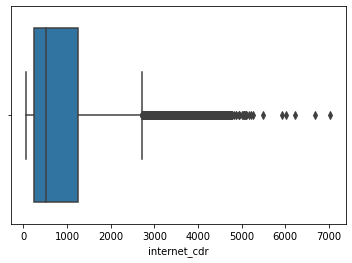

In [7]:
sns.boxplot(x=df['internet_cdr'])

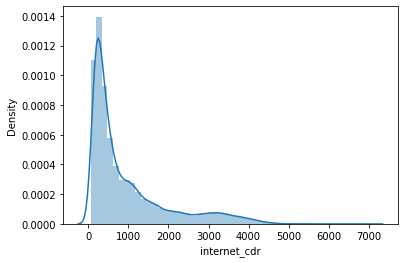

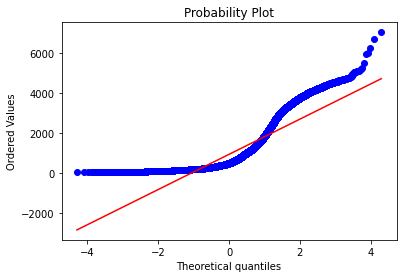

In [8]:
fig = plt.figure()
ax = fig.gca()
sns.distplot(df['internet_cdr'])
plt.show()

#Probability plot
fig = plt.figure()
res = stats.probplot(df['internet_cdr'], plot=plt)

## <h3> 1- Tukey’s box plot method</h3>
<a id="m1"></a>

<img src="https://raw.githubusercontent.com/abdallah-elsawy/Time-Series-Anomaly-Detection/main/Outputs/Tukeys-Box-plot-method/Tukey%E2%80%99s-box.jpg">

in this method we depend on the pox plot to determine if the point is outlier or not and not 
only that it gives us the ability to decide if this outlier is possible or probable outlier point; by 
calculate the following parameters: 
- 25th percentile (Q1) 
- 75th percentile (Q3) 
- interquartile range (IQR = Q3 – Q1) 
- Lower inner fence: Q1 – (1.5 * IQR) 
- Upper inner fence: Q3 + (1.5 * IQR) 
- Lower outer fence: Q1 – (3 * IQR) 
- Upper outer fence: Q3 + (3 * IQR) 

Then decide if the point between the inner fence and outer fence it considered as a possible 
outlier point. And if the point lies outside the outer fence, it will be considered as probable 
outlier. 

#### First apply on a random grid

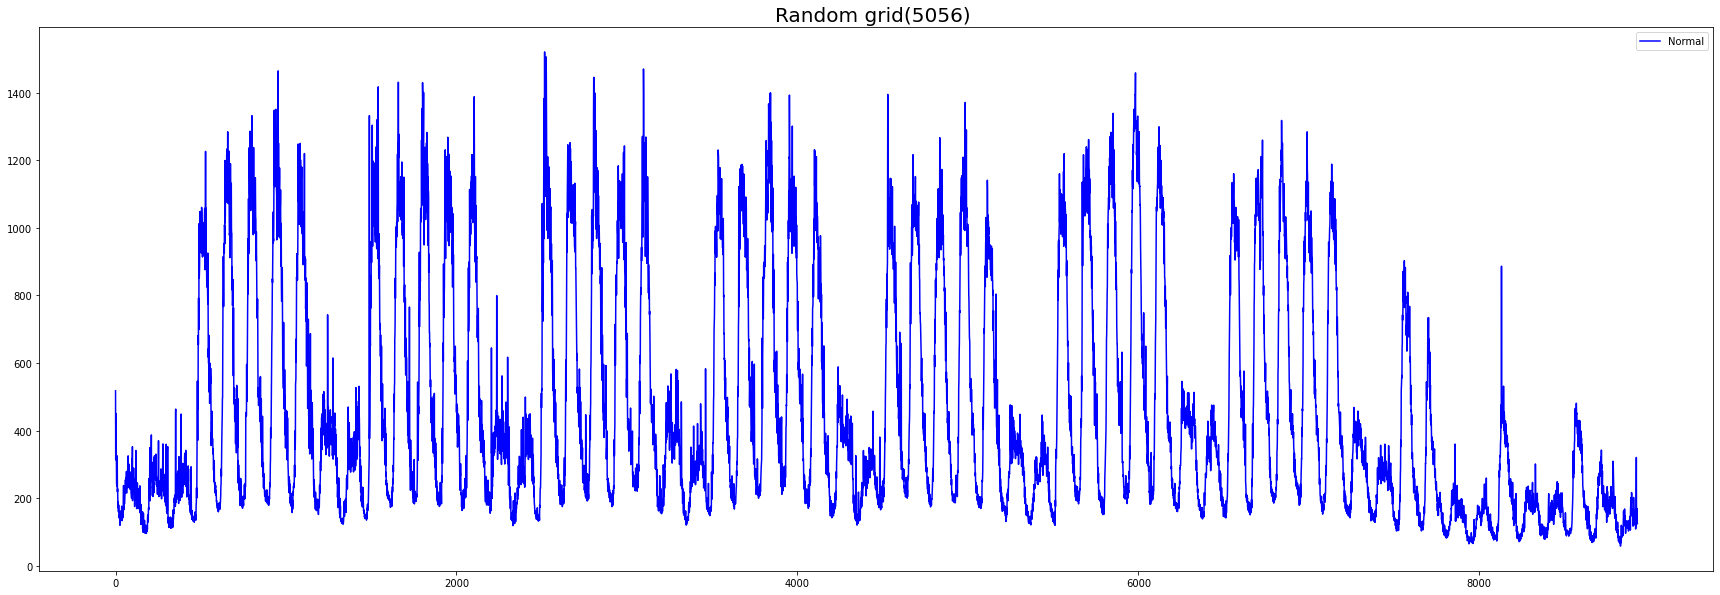

In [9]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(df.groupby("grid_square").get_group(5056).index, 
        df.groupby("grid_square").get_group(5056)['internet_cdr'], color='blue', label = 'Normal')
ax.set_title('Random grid(5056) ', fontsize=20)
plt.legend()
plt.show();

In [10]:
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss


In [11]:
random_grid=df.groupby("grid_square").get_group(5056)

probable_outliers_tm, possible_outliers_tm = tukeys_method(random_grid, "internet_cdr")

print(probable_outliers_tm)
print("*****************************************************************************************")
print(possible_outliers_tm)

[]
*****************************************************************************************
[800, 931, 939, 940, 954, 1489, 1541, 1659, 1799, 1801, 1802, 1806, 1807, 2104, 2514, 2517, 2524, 2526, 2527, 2804, 2805, 2806, 2807, 2811, 3097, 3098, 3831, 3832, 3833, 3835, 3839, 3842, 3953, 4530, 4984, 5852, 5975, 5979, 5981, 5982, 5983, 5995, 5996]


In [12]:
len(probable_outliers_tm)

0

In [13]:
len(possible_outliers_tm)

43

In [14]:
anomaly = pd.DataFrame(possible_outliers_tm)
anomaly['Anomaly'] = 1
anomaly.set_index(0, inplace=True)

In [15]:
random_grid = pd.concat([random_grid, anomaly], axis=1)

In [16]:
random_grid['Anomaly'] = random_grid['Anomaly'].replace(np.nan, False)
random_grid['Anomaly'] = random_grid['Anomaly'].replace(1.0, True)

In [17]:
random_grid

grid_square  internet_cdr                time  Anomaly
0            5056    517.607260 2013-01-11 00:00:00    False
1            5056    314.551305 2013-01-11 00:10:00    False
2            5056    341.527327 2013-01-11 00:20:00    False
3            5056    450.012415 2013-01-11 00:30:00    False
4            5056    312.166782 2013-01-11 00:40:00    False
...           ...           ...                 ...      ...
8923         5056    135.564582 2014-01-01 23:10:00    False
8924         5056    143.685136 2014-01-01 23:20:00    False
8925         5056    168.564783 2014-01-01 23:30:00    False
8926         5056    123.497984 2014-01-01 23:40:00    False
8927         5056    124.569821 2014-01-01 23:50:00    False

[8928 rows x 4 columns]

In [18]:
random_grid['Anomaly'].value_counts()

False    8885
True       43
Name: Anomaly, dtype: int64

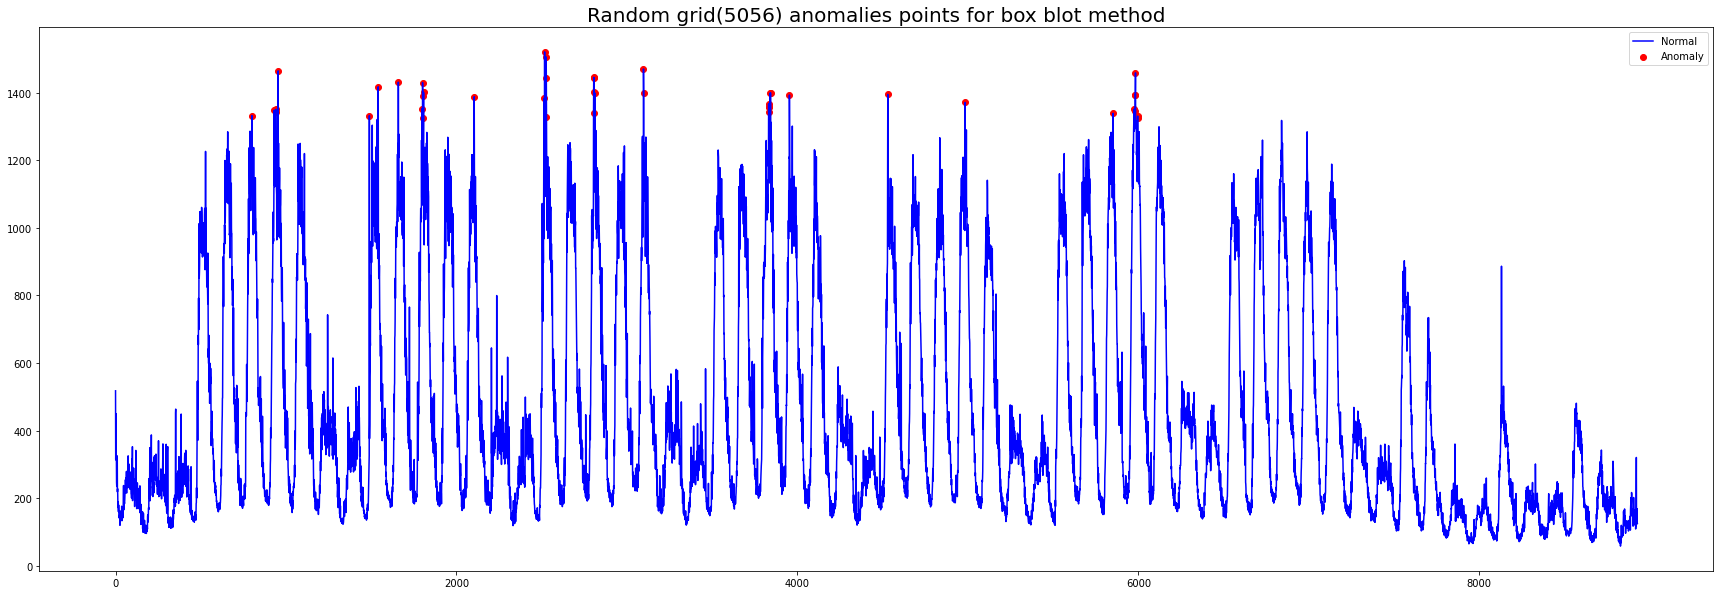

In [19]:
fig, ax = plt.subplots(figsize=(30,10))

anomaly = random_grid.loc[random_grid['Anomaly'] == True, ['internet_cdr']] 

ax.plot(random_grid.index, random_grid['internet_cdr'], color='blue', label = 'Normal')
ax.scatter(anomaly.index,anomaly['internet_cdr'], color='red', label = 'Anomaly')
ax.set_title('Random grid(5056) anomalies points for box blot method', fontsize=20)
plt.legend()
plt.show();

In [20]:
# fig1 = px.line(random_grid,  y="internet_cdr")
# fig1.update_traces(line=dict(color = 'magenta'))

# anomaly = random_grid.loc[random_grid['Anomaly'] == True, ['internet_cdr']] 
# fig2 = px.scatter(anomaly,y="internet_cdr")

# fig3 = go.Figure(data=fig1.data + fig2.data)
# fig3.update_layout(title="Random grid(5056) anomalies points for box blot method")
# fig3.show()

#### Second apply on all grids

In [21]:
df = pd.read_csv('/kaggle/input/milan-dataset/final_data.csv',parse_dates= ["time"])

In [22]:
full_grid = df.groupby("grid_square")
grids = list(full_grid.groups.keys())

In [23]:
grids

[5056, 5057, 5058, 5156, 5157, 5158, 5256, 5257, 5258]

In [24]:
data=[]
for grid in grids:
    full_grid = df.groupby("grid_square").get_group(grid)
    data.append(full_grid)
data

[      grid_square  internet_cdr                time
 0            5056    517.607260 2013-01-11 00:00:00
 1            5056    314.551305 2013-01-11 00:10:00
 2            5056    341.527327 2013-01-11 00:20:00
 3            5056    450.012415 2013-01-11 00:30:00
 4            5056    312.166782 2013-01-11 00:40:00
 ...           ...           ...                 ...
 8923         5056    135.564582 2014-01-01 23:10:00
 8924         5056    143.685136 2014-01-01 23:20:00
 8925         5056    168.564783 2014-01-01 23:30:00
 8926         5056    123.497984 2014-01-01 23:40:00
 8927         5056    124.569821 2014-01-01 23:50:00
 
 [8928 rows x 3 columns],
        grid_square  internet_cdr                time
 8928          5057    403.180777 2013-01-11 00:00:00
 8929          5057    310.131943 2013-01-11 00:10:00
 8930          5057    308.682959 2013-01-11 00:20:00
 8931          5057    357.021359 2013-01-11 00:30:00
 8932          5057    303.474336 2013-01-11 00:40:00
 ...        

In [25]:
x=len(grids)
x

9

In [26]:
data_2=pd.DataFrame()
anomalies= pd.DataFrame()
for i in range(x):
    

    probable_outliers_tm, possible_outliers_tm = tukeys_method(data[i], "internet_cdr")
    
    anomaly = pd.DataFrame(possible_outliers_tm)
    anomaly['Anomaly'] = 1
    anomaly.set_index(0, inplace=True)

    data_2 = pd.concat([data[i].reset_index(drop=True), anomaly], axis=1)
    
    print("========== grid number {} done ==========".format(i+1))
    print(data_2['Anomaly'].value_counts())
    
    
    anomalies=anomalies.append(data_2)
    print(data_2)
    print("===================================================================")
#     print(anomalies)

========== grid number 1 done ==========
1.0    43
Name: Anomaly, dtype: int64
      grid_square  internet_cdr                time  Anomaly
0            5056    517.607260 2013-01-11 00:00:00      NaN
1            5056    314.551305 2013-01-11 00:10:00      NaN
2            5056    341.527327 2013-01-11 00:20:00      NaN
3            5056    450.012415 2013-01-11 00:30:00      NaN
4            5056    312.166782 2013-01-11 00:40:00      NaN
...           ...           ...                 ...      ...
8923         5056    135.564582 2014-01-01 23:10:00      NaN
8924         5056    143.685136 2014-01-01 23:20:00      NaN
8925         5056    168.564783 2014-01-01 23:30:00      NaN
8926         5056    123.497984 2014-01-01 23:40:00      NaN
8927         5056    124.569821 2014-01-01 23:50:00      NaN

[8928 rows x 4 columns]
========== grid number 2 done ==========
1.0    33
Name: Anomaly, dtype: int64
      grid_square  internet_cdr                time  Anomaly
0            5057    403

In [27]:
#     probable_outliers_tm, possible_outliers_tm = tukeys_method(data[2], "internet_cdr")
    
#     anomaly = pd.DataFrame(possible_outliers_tm)
#     anomaly['Anomaly'] = 1
#     anomaly.set_index(0, inplace=True)

#     x=pd.concat([data[2].reset_index(drop=True), anomaly], axis=1)
#     print (x)
#     print(x['Anomaly'].value_counts())

#     print("========== grid number {} done ==========".format(i+1))

In [28]:
anomalies.reset_index(drop=True,inplace=True)

In [29]:
anomalies['Anomaly'] = anomalies['Anomaly'].replace(np.nan, False)
anomalies['Anomaly'] = anomalies['Anomaly'].replace(1.0, True)

In [30]:
anomalies['Anomaly'].value_counts()

False    80137
True       215
Name: Anomaly, dtype: int64

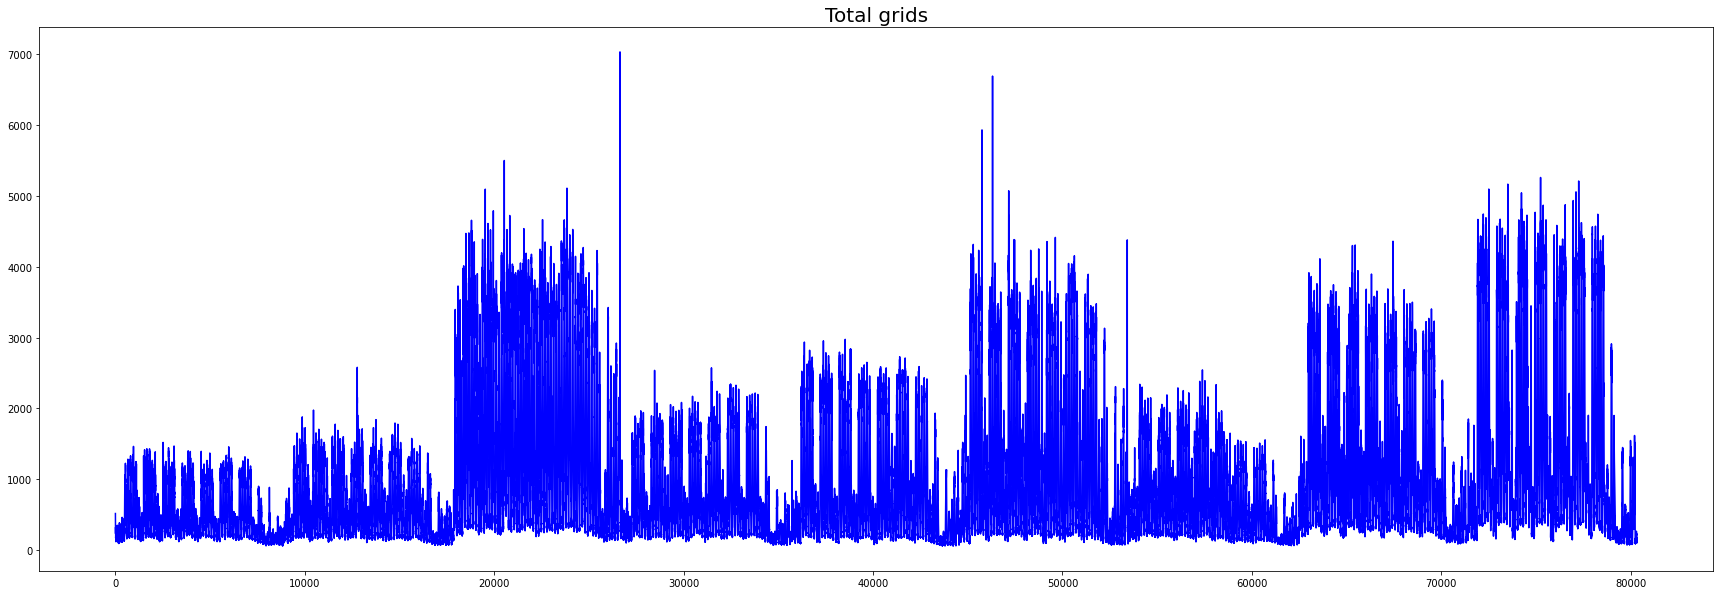

In [31]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(df.index, df['internet_cdr'], color='blue', label = 'Normal')
ax.set_title('Total grids', fontsize=20)
plt.show();

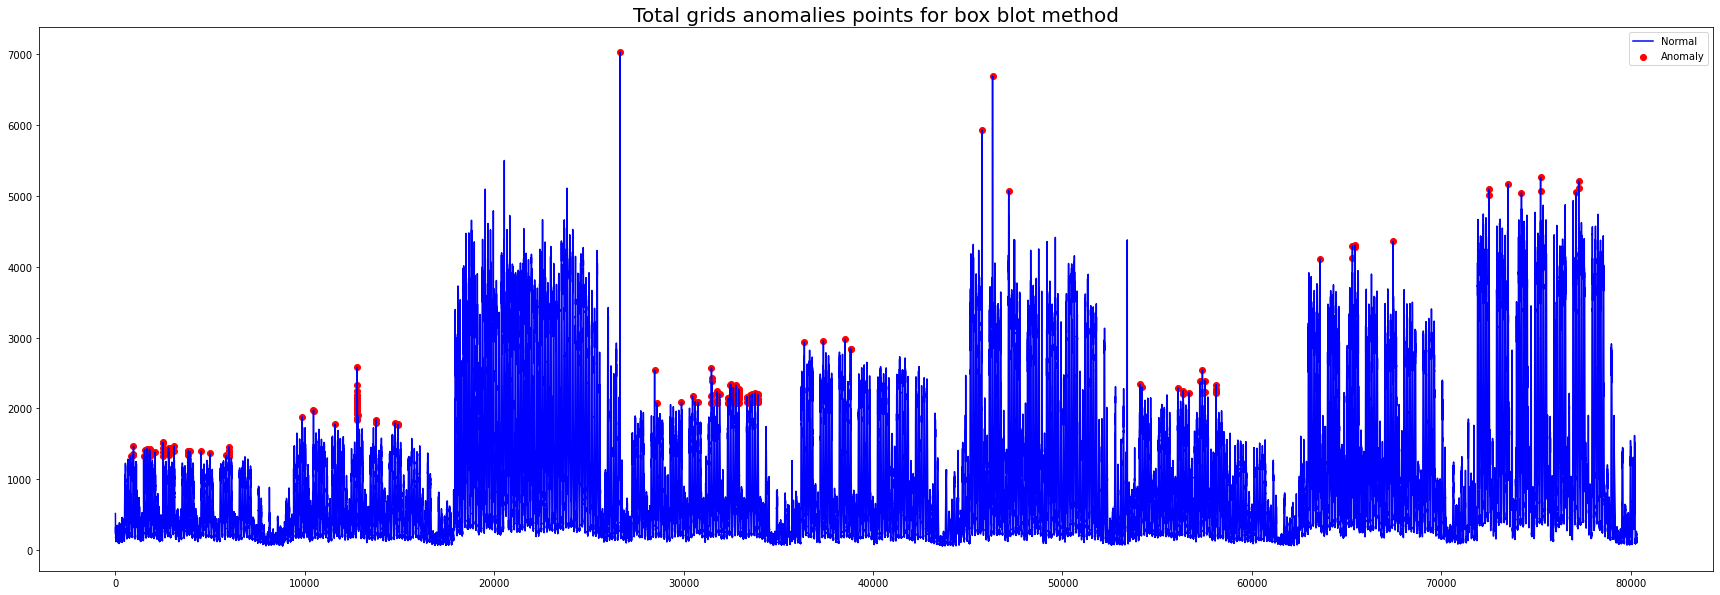

In [32]:
fig, ax = plt.subplots(figsize=(30,10))

anomaly = anomalies.loc[anomalies['Anomaly'] == True, ['internet_cdr']] 

ax.plot(df.index, df['internet_cdr'], color='blue', label = 'Normal')
ax.scatter(anomaly.index,anomaly['internet_cdr'], color='red', label = 'Anomaly')
ax.set_title('Total grids anomalies points for box blot method', fontsize=20)
plt.legend()
plt.show();

## <h3> 2- Isolation forest.</h3>
<a id="m2"></a>

In this method we will depend on the detection using some Machine Learning algorithms. In the 
we will depend on Isolation Forest. 

One of those algorithms is the Isolation Forest method. Isolation Forest build using the decision 
trees which depend on the points that go deeper into the tree are not anomalies and points 
which go short distance have big probability to be anomalies, and it is unsupervised learning 
model which used without labeled data. 

The algorithm goes by selecting a sample of the dataset then branch it on the binary tress by 
setting a threshold if the sample we selected is less than this threshold it will be in the left 
branch and if it not it will be in the right branch. This process repeated until we every point in 
the dataset is isolated. 

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [34]:
df = pd.read_csv('/kaggle/input/milan-dataset/final_data.csv', parse_dates= ["time"])

#### First apply on a random grid

In [35]:
random_grid = df.groupby("grid_square").get_group(5056)
random_grid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8928 entries, 0 to 8927
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   grid_square   8928 non-null   int64         
 1   internet_cdr  8928 non-null   float64       
 2   time          8928 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 279.0 KB


In [36]:
random_grid = df.groupby("grid_square").get_group(5056)
random_grid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8928 entries, 0 to 8927
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   grid_square   8928 non-null   int64         
 1   internet_cdr  8928 non-null   float64       
 2   time          8928 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 279.0 KB


In [37]:
# train isolation forest
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(random_grid["internet_cdr"].values.reshape(-1, 1))
df_data = pd.DataFrame(np_scaled)

model =  IsolationForest(contamination=outliers_fraction)
model.fit(df_data) 

IsolationForest(contamination=0.01)

In [38]:
# predict isolation forest
anomaly = model.predict(df_data)

In [39]:
anomaly = pd.DataFrame(anomaly,columns=['anomaly'])
anomaly

anomaly
0           1
1           1
2           1
3           1
4           1
...       ...
8923        1
8924        1
8925        1
8926        1
8927        1

[8928 rows x 1 columns]

In [40]:
random_grid = pd.concat([random_grid, anomaly], axis=1)
random_grid

grid_square  internet_cdr                time  anomaly
0            5056    517.607260 2013-01-11 00:00:00        1
1            5056    314.551305 2013-01-11 00:10:00        1
2            5056    341.527327 2013-01-11 00:20:00        1
3            5056    450.012415 2013-01-11 00:30:00        1
4            5056    312.166782 2013-01-11 00:40:00        1
...           ...           ...                 ...      ...
8923         5056    135.564582 2014-01-01 23:10:00        1
8924         5056    143.685136 2014-01-01 23:20:00        1
8925         5056    168.564783 2014-01-01 23:30:00        1
8926         5056    123.497984 2014-01-01 23:40:00        1
8927         5056    124.569821 2014-01-01 23:50:00        1

[8928 rows x 4 columns]

In [41]:
random_grid['anomaly'].value_counts()

 1    8839
-1      89
Name: anomaly, dtype: int64

In [42]:
fig1 = px.line(random_grid,  y="internet_cdr")
fig1.update_traces(line=dict(color = 'turquoise'))

anomaly = random_grid.loc[random_grid['anomaly'] == -1, ['internet_cdr']]

fig2 = px.scatter(anomaly,y='internet_cdr')
fig3 = go.Figure(data=fig1.data + fig2.data)

fig3.update_layout(title="Random grid(5056) anomalies points for isolation forest")
fig3.show()

#### Second apply on all grids 

In [43]:
data=[]
for grid in grids:
    full_grid = df.groupby("grid_square").get_group(grid)
    data.append(full_grid)
data

[      grid_square  internet_cdr                time
 0            5056    517.607260 2013-01-11 00:00:00
 1            5056    314.551305 2013-01-11 00:10:00
 2            5056    341.527327 2013-01-11 00:20:00
 3            5056    450.012415 2013-01-11 00:30:00
 4            5056    312.166782 2013-01-11 00:40:00
 ...           ...           ...                 ...
 8923         5056    135.564582 2014-01-01 23:10:00
 8924         5056    143.685136 2014-01-01 23:20:00
 8925         5056    168.564783 2014-01-01 23:30:00
 8926         5056    123.497984 2014-01-01 23:40:00
 8927         5056    124.569821 2014-01-01 23:50:00
 
 [8928 rows x 3 columns],
        grid_square  internet_cdr                time
 8928          5057    403.180777 2013-01-11 00:00:00
 8929          5057    310.131943 2013-01-11 00:10:00
 8930          5057    308.682959 2013-01-11 00:20:00
 8931          5057    357.021359 2013-01-11 00:30:00
 8932          5057    303.474336 2013-01-11 00:40:00
 ...        

In [44]:
data[0]

grid_square  internet_cdr                time
0            5056    517.607260 2013-01-11 00:00:00
1            5056    314.551305 2013-01-11 00:10:00
2            5056    341.527327 2013-01-11 00:20:00
3            5056    450.012415 2013-01-11 00:30:00
4            5056    312.166782 2013-01-11 00:40:00
...           ...           ...                 ...
8923         5056    135.564582 2014-01-01 23:10:00
8924         5056    143.685136 2014-01-01 23:20:00
8925         5056    168.564783 2014-01-01 23:30:00
8926         5056    123.497984 2014-01-01 23:40:00
8927         5056    124.569821 2014-01-01 23:50:00

[8928 rows x 3 columns]

In [45]:
# train isolation forest
full_anomaly = pd.DataFrame()
for i in range (x):
    
    full_grid = data[i]
    
    outliers_fraction = float(.01)

    scaler = StandardScaler()
    np_scaled = scaler.fit_transform(full_grid["internet_cdr"].values.reshape(-1, 1))
    df_data = pd.DataFrame(np_scaled)

    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(df_data) 
    anomaly = model.predict(df_data)
    anomaly = pd.DataFrame(anomaly,columns=['anomaly'])
    print("========== grid number {} predicted ==========".format(i+1))
    full_anomaly = full_anomaly.append(anomaly)

========== grid number 1 predicted ==========
========== grid number 2 predicted ==========
========== grid number 3 predicted ==========
========== grid number 4 predicted ==========
========== grid number 5 predicted ==========
========== grid number 6 predicted ==========
========== grid number 7 predicted ==========
========== grid number 8 predicted ==========
========== grid number 9 predicted ==========


In [46]:
full_anomaly.reset_index(inplace= True)
full_anomaly.drop('index', axis=1, inplace=True)
full_anomaly

anomaly
0            1
1            1
2            1
3            1
4            1
...        ...
80347        1
80348        1
80349        1
80350        1
80351        1

[80352 rows x 1 columns]

In [47]:
print(df.shape)
print(full_anomaly.shape)

(80352, 3)
(80352, 1)


In [48]:
df = pd.concat([df, full_anomaly], axis=1)
df

grid_square  internet_cdr                time  anomaly
0             5056    517.607260 2013-01-11 00:00:00        1
1             5056    314.551305 2013-01-11 00:10:00        1
2             5056    341.527327 2013-01-11 00:20:00        1
3             5056    450.012415 2013-01-11 00:30:00        1
4             5056    312.166782 2013-01-11 00:40:00        1
...            ...           ...                 ...      ...
80347         5258    153.632216 2014-01-01 23:10:00        1
80348         5258    125.178334 2014-01-01 23:20:00        1
80349         5258    104.560788 2014-01-01 23:30:00        1
80350         5258    132.476372 2014-01-01 23:40:00        1
80351         5258    123.704528 2014-01-01 23:50:00        1

[80352 rows x 4 columns]

In [49]:
df['anomaly'].value_counts()

 1    79544
-1      808
Name: anomaly, dtype: int64

In [50]:
fig1 = px.line(df,  y="internet_cdr")
fig1.update_traces(line=dict(color = 'rgba(250,100,10,0.2)'))
fig1.update_layout(title="Total grids")
fig1.show()

In [51]:
fig1 = px.line(df,  y="internet_cdr")
fig1.update_traces(line=dict(color = 'rgba(250,100,10,0.2)'))
anomaly = df.loc[df['anomaly'] == -1, ['internet_cdr']] 

fig2 = px.scatter(anomaly,y='internet_cdr')

fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.update_layout(title="Total grids anomalies points for isolation forest")
fig3.show()

In [52]:

# fig, ax = plt.subplots(figsize=(30,10))

# anomaly = df.loc[df['anomaly'] == -1, ['internet_cdr']] 

# ax.plot(df.index, df['internet_cdr'], color='blue', label = 'Normal')
# ax.scatter(anomaly.index,anomaly['internet_cdr'], color='red', label = 'Anomaly')
# ax.set_title('All grids anomalies points', fontsize=20)
# plt.legend()
# plt.show();

## <h3> 3- Anomaly Detection with LSTM Autoencoders. </h3>
<a id="m3"></a>

In this method we will depend on the detection using the forecasting by Deep Learning 
algorithms. In the forecasting methods we depend on predict the next point with the addition 
of some noise and make comparison of this point and the true point at this timestamp by 
finding the difference between the two points then add threshold finally find the anomalies by 
compare the difference of the two points with this threshold (we used the Mean absolute error 
MAE). 

Autoencoders are type of self-supervised learning model which are a neural network that learn 
from the input data. We use autoencoder because the Principal Component Analysis (PCA), 
which we used in the previous method we depend on the linear algebra to do the models, but 
by using autoencoders we depended on the non-linear transformation like by use the activation 
functions; those non-linearity gives us the ability to go deep in the number of the neural 
network layers. 

Long Short-Term Memory (LSTM) is a type of artificial recurrent neural network (RNN). which 
are designed to handle sequential data, with the previous step's output being fed as the current 
step's input. 

<img src="https://raw.githubusercontent.com/abdallah-elsawy/Time-Series-Anomaly-Detection/main/Outputs/LSTM-Autoencoders/Anomaly-detection-autoencoders.png">

We apply some dimensionality reduction on our dataset by use encoder to make the dimension 
small then use the decoder to get it back and that minimize the reconstruction loss. In fact, that 
will make us lose some information but it gives us the ability to know the main pattern of the 
information and thought that we could define any information out hits pattern under sone 
threshold will be outlier. 

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [54]:
df = pd.read_csv('/kaggle/input/milan-dataset/final_data.csv',parse_dates=['time'], index_col='time')

In [55]:
df= df.groupby("grid_square").get_group(5056)

In [56]:
train_size = int(len(df) * 0.85)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(7588, 2) (1340, 2)


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(train[['internet_cdr']])

train['internet_cdr'] = scaler.transform(train[['internet_cdr']])
test['internet_cdr'] = scaler.transform(test[['internet_cdr']])

In [58]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [59]:
TIME_STEPS = 30

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train[['internet_cdr']], train.internet_cdr, TIME_STEPS)
X_test, y_test = create_dataset(test[['internet_cdr']], test.internet_cdr, TIME_STEPS)

print(X_train.shape)

(7558, 30, 1)


In [60]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=64, 
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train.shape[2])))
model.compile(loss='mae', optimizer='adam')
model.summary()

2022-02-23 02:28:27.679387: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 02:28:27.680433: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 02:28:27.681073: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-23 02:28:27.681903: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 30, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 64)            33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
time_distributed (TimeDistri (None, 30, 1)             65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
____________________________________________________

In [61]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

2022-02-23 02:28:30.769818: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-02-23 02:28:34.143220: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


213/213 [==============================] - 6s 9ms/step - loss: 0.2190 - val_loss: 0.1124
Epoch 2/20
213/213 [==============================] - 1s 6ms/step - loss: 0.1746 - val_loss: 0.0980
Epoch 3/20
213/213 [==============================] - 2s 7ms/step - loss: 0.1615 - val_loss: 0.0971
Epoch 4/20
213/213 [==============================] - 1s 6ms/step - loss: 0.1556 - val_loss: 0.0857
Epoch 5/20
213/213 [==============================] - 1s 7ms/step - loss: 0.1509 - val_loss: 0.0855
Epoch 6/20
213/213 [==============================] - 1s 6ms/step - loss: 0.1499 - val_loss: 0.0925
Epoch 7/20
213/213 [==============================] - 1s 6ms/step - loss: 0.1502 - val_loss: 0.0967
Epoch 8/20
213/213 [==============================] - 1s 6ms/step - loss: 0.1496 - val_loss: 0.0852
Epoch 9/20
213/213 [==============================] - 1s 6ms/step - loss: 0.1454 - val_loss: 0.0809
Epoch 10/20
213/213 [==============================] - 1s 6ms/step - loss: 0.1453 - val_loss: 0.0853
Epoch 11/2

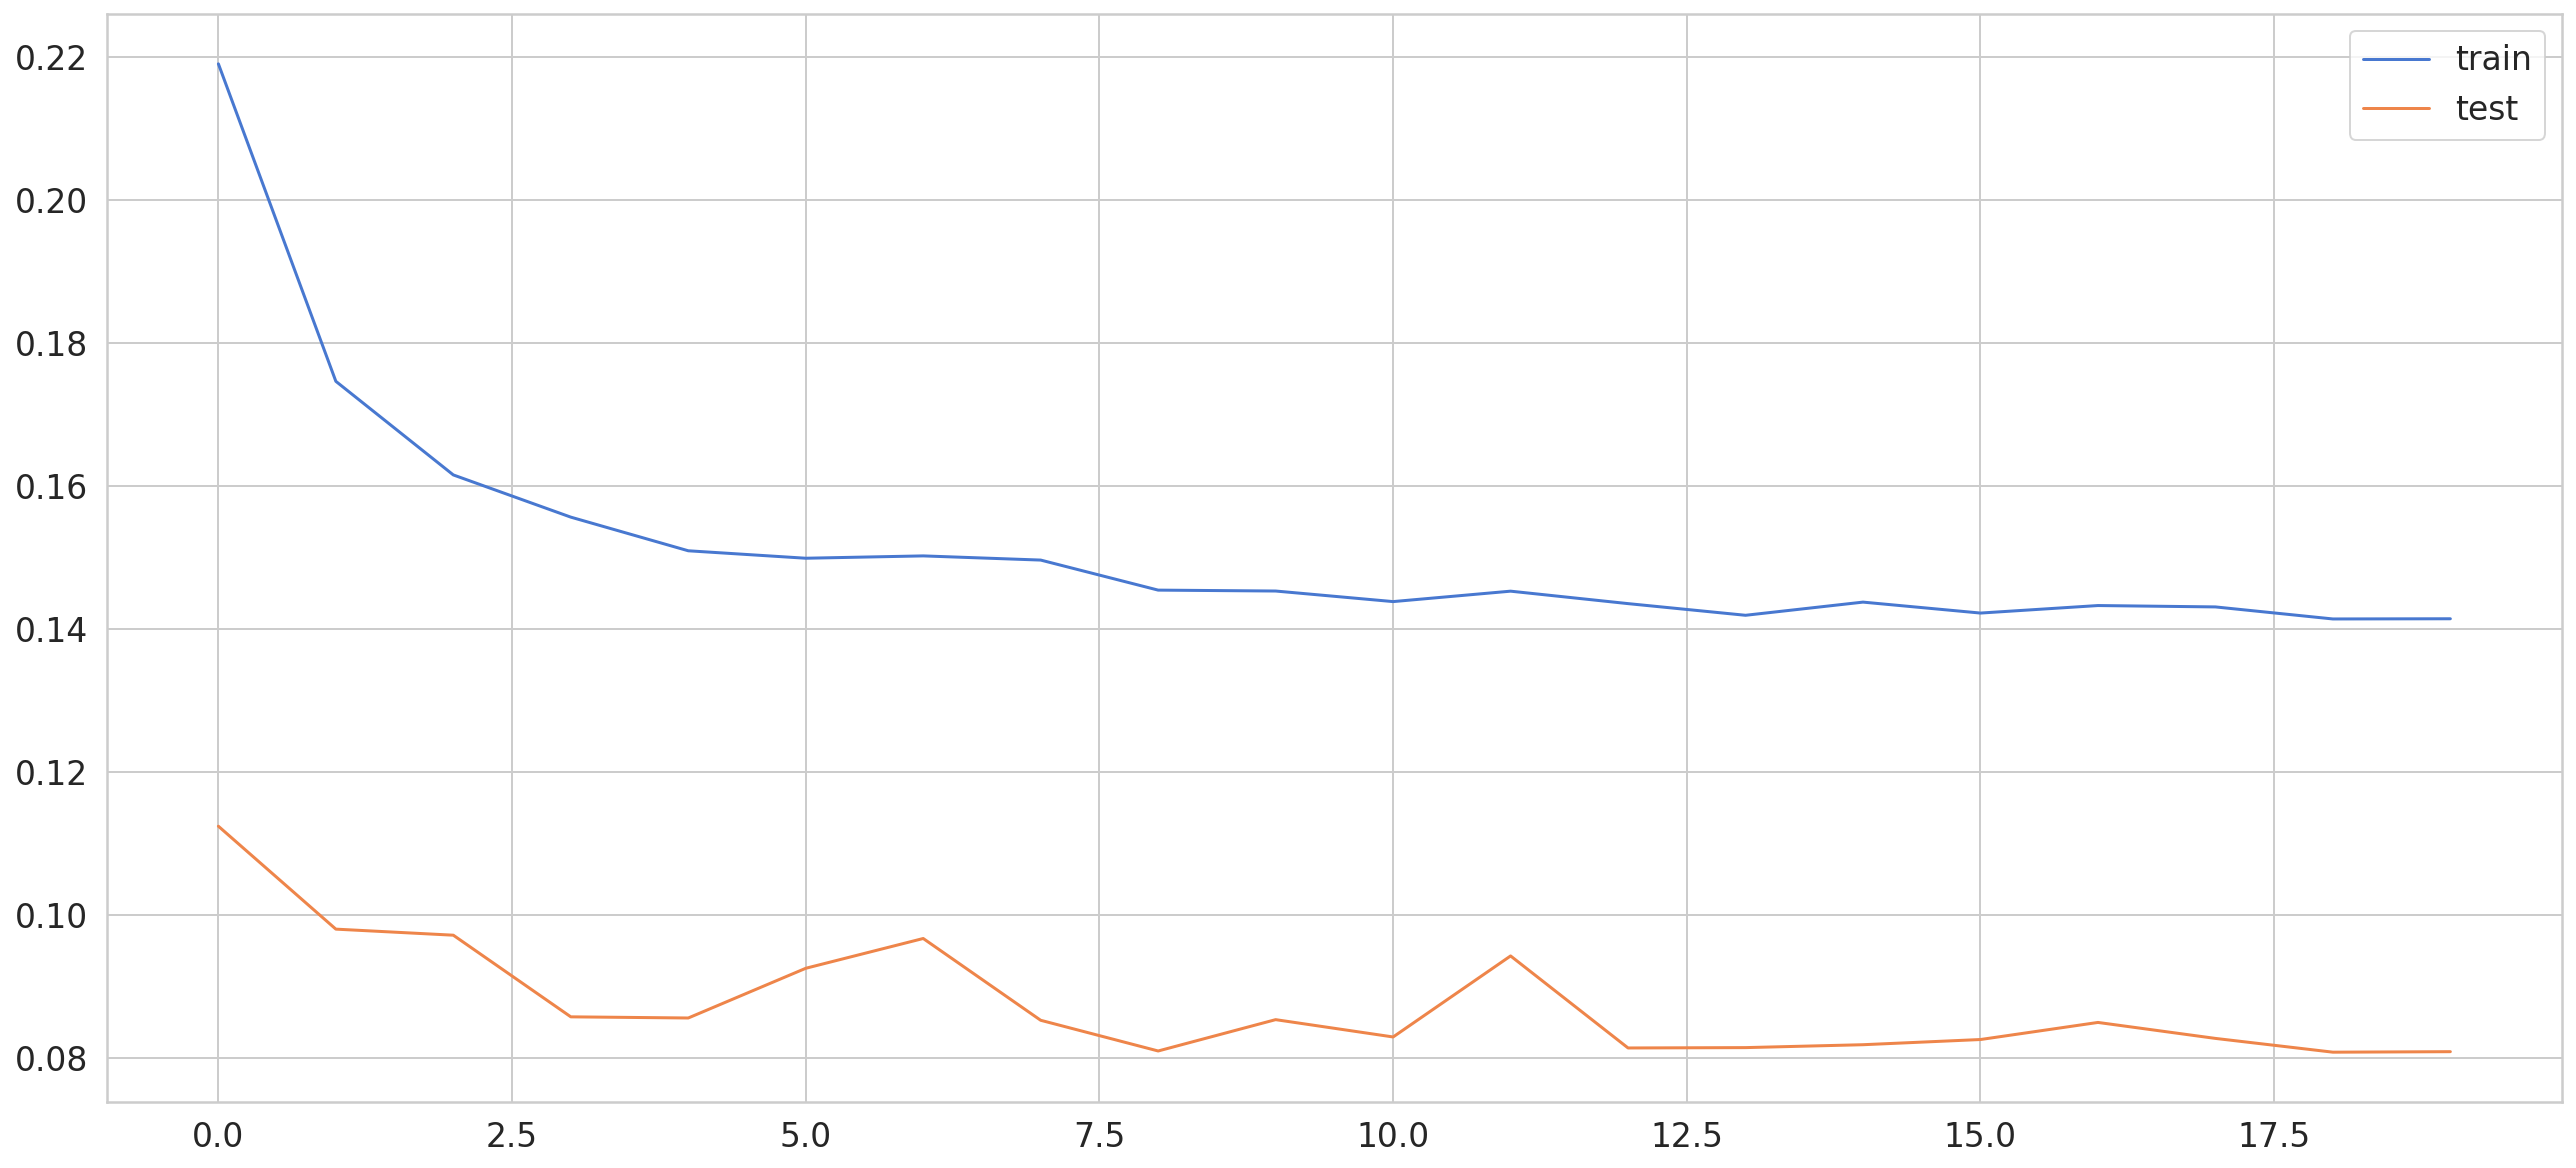

In [62]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [63]:
X_test_pred = model.predict(X_test)

test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

In [64]:
len(test_mae_loss)

1310

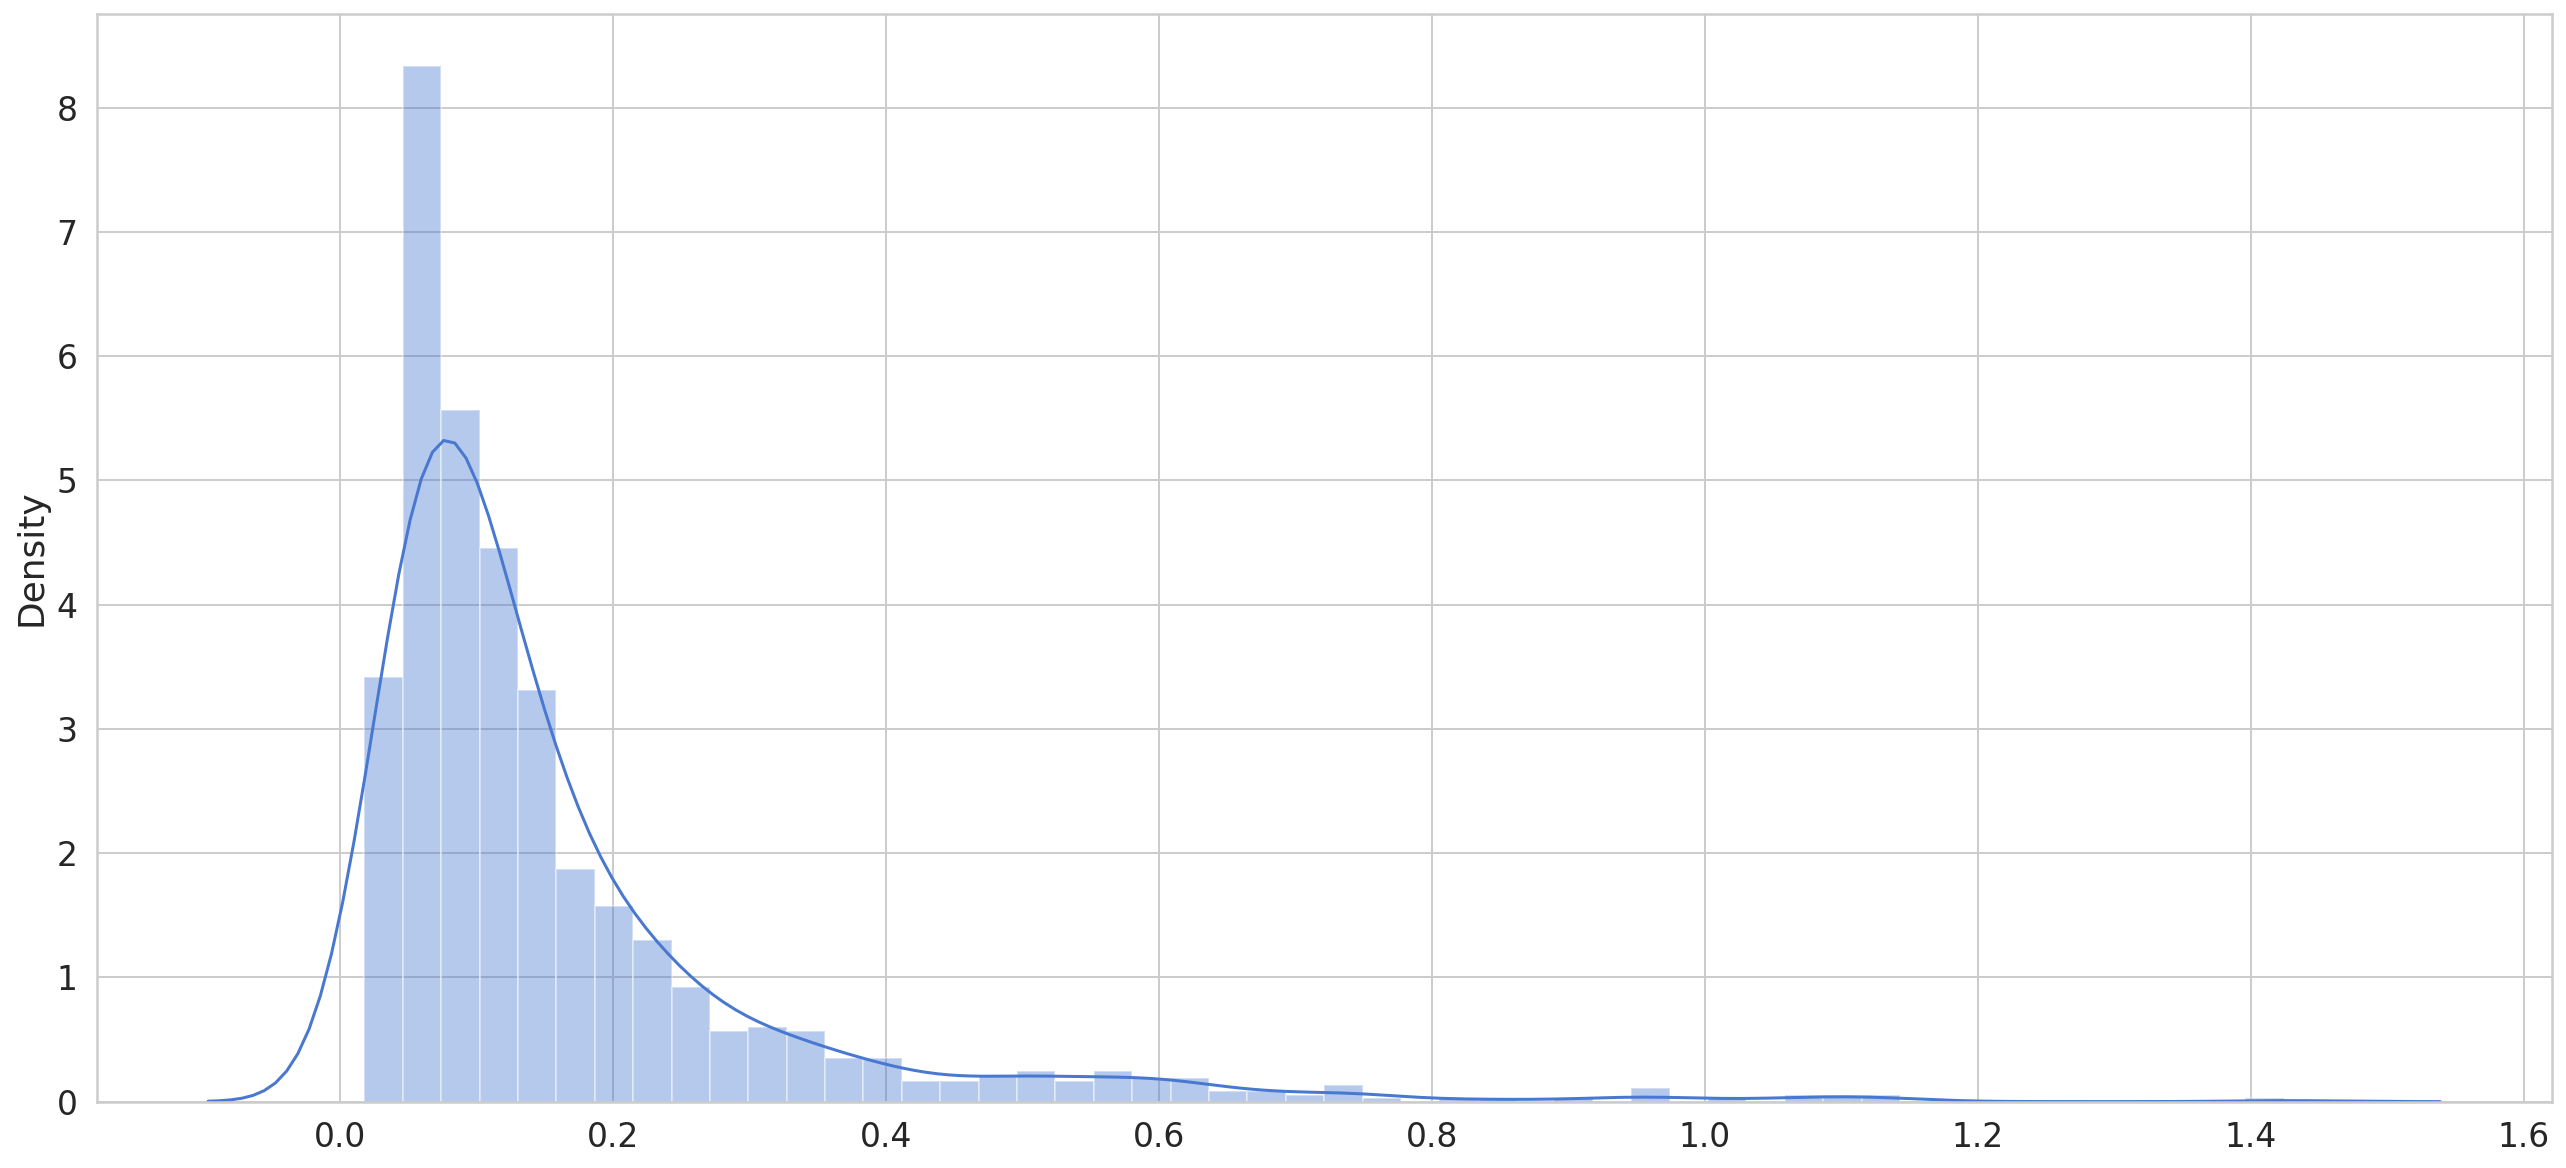

In [65]:
sns.distplot(test_mae_loss, bins=50, kde=True);

Reconstruction error threshold: 1.9894044077343693


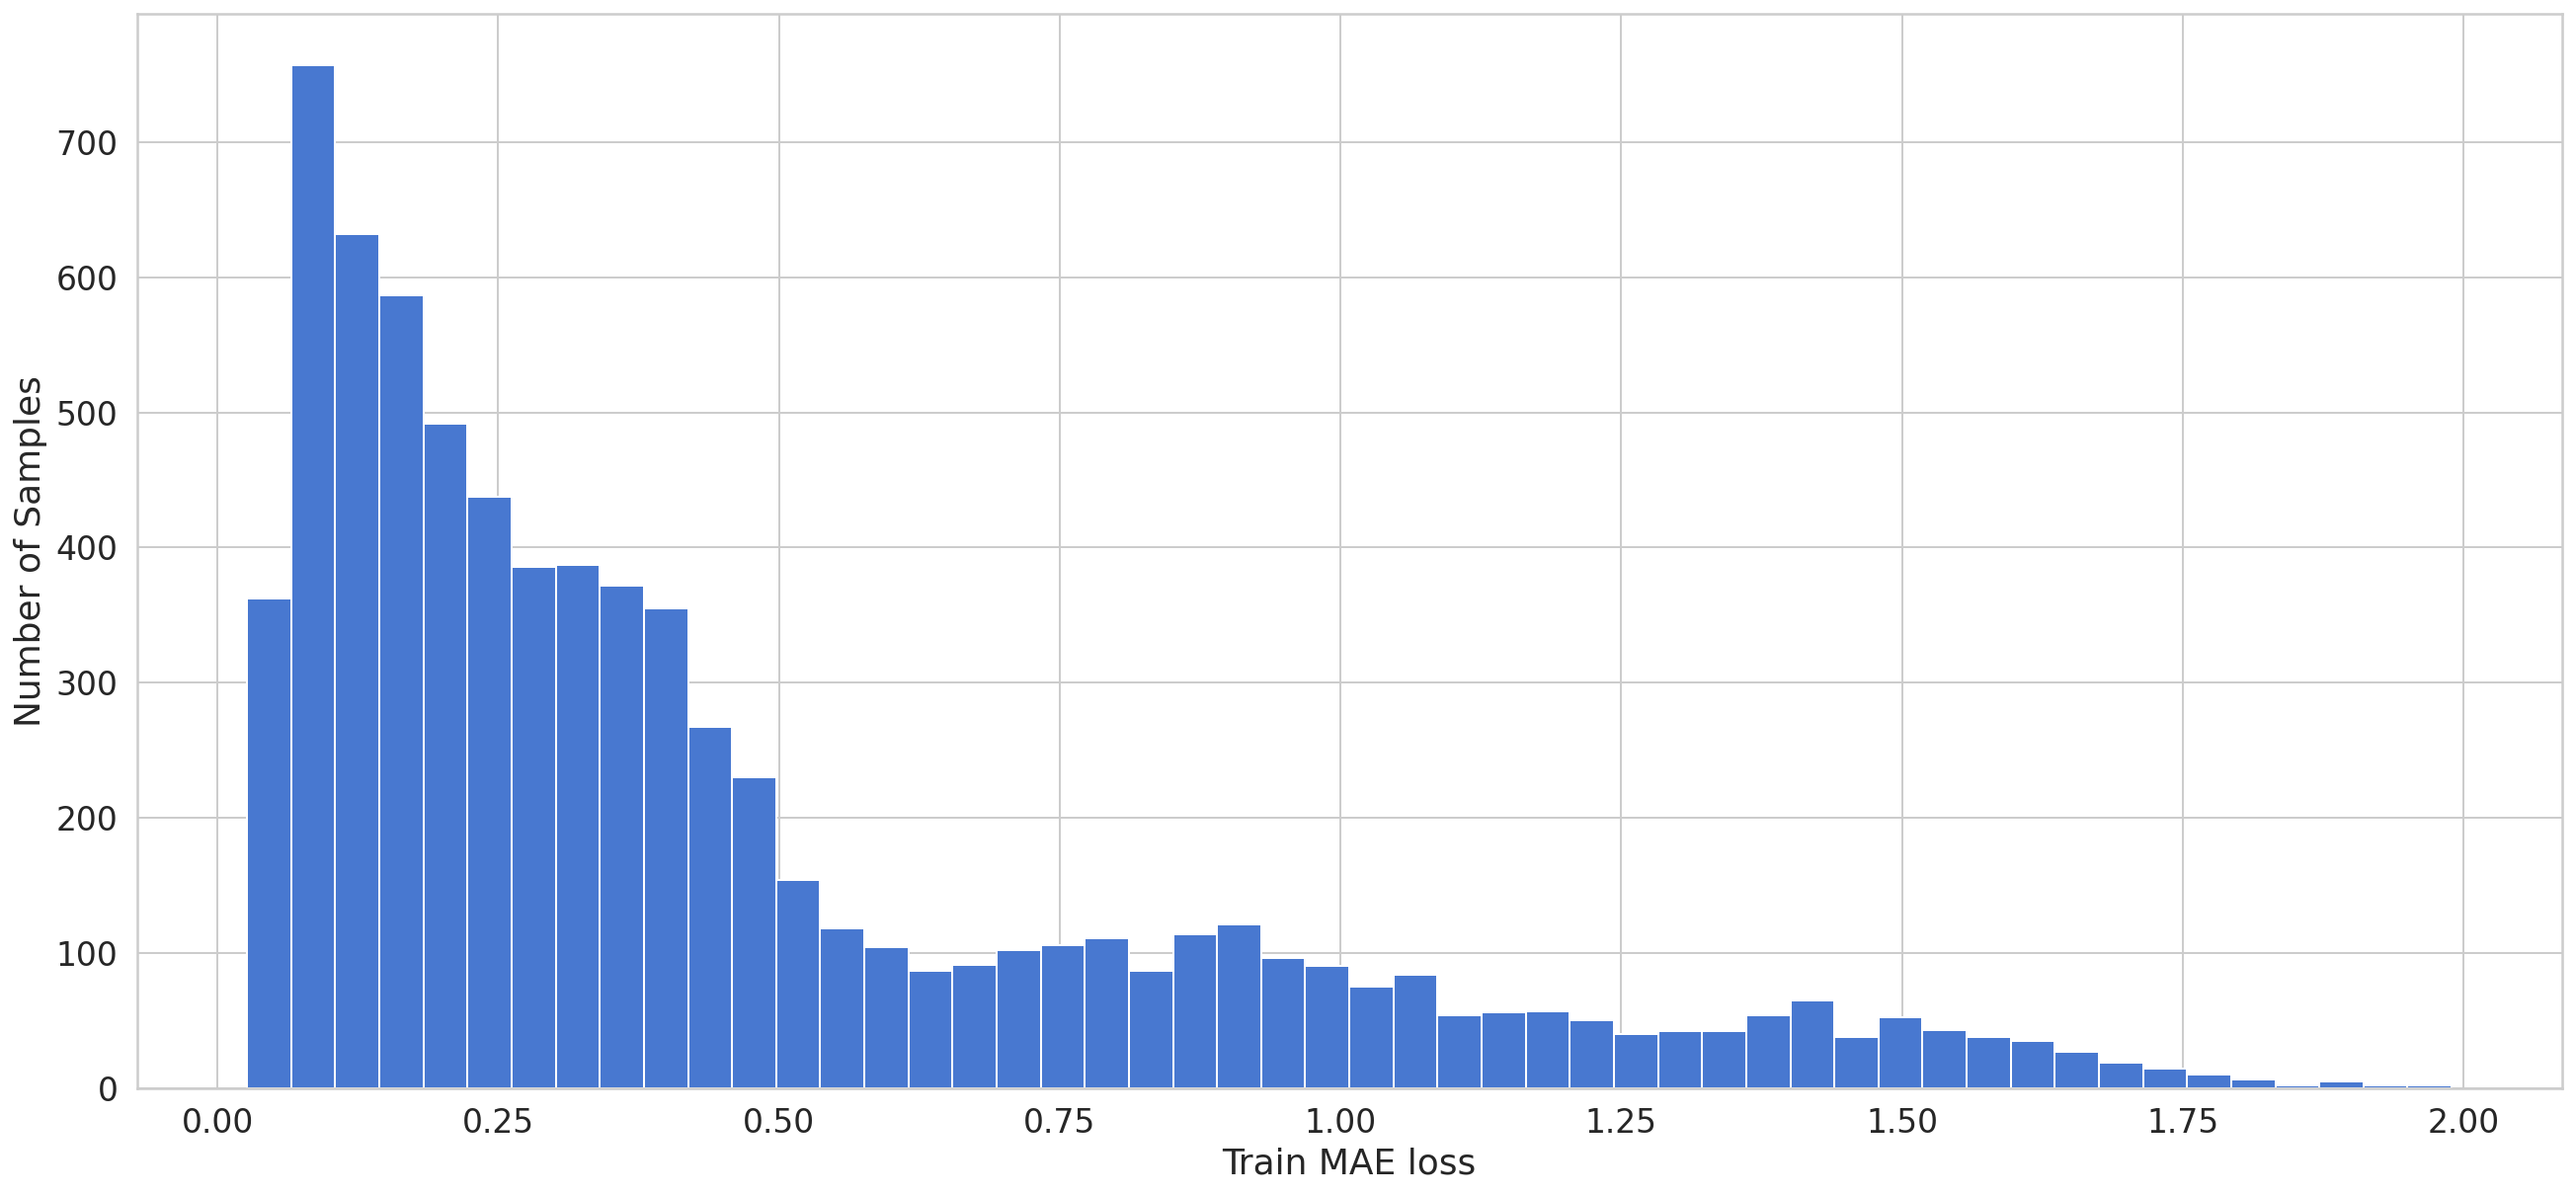

In [66]:
X_train_pred = model.predict(X_train, verbose=0)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

threshold = np.max(train_mae_loss)
print(f'Reconstruction error threshold: {threshold}')

In [67]:
THRESHOLD = 0.65

test_score_df = pd.DataFrame(index=test[TIME_STEPS:].index)
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['internet_cdr'] = test[TIME_STEPS:].internet_cdr

 To determine the cutoff point we use the Mean Absolute Error (MAE). We use the MAE 
because it so sensitive toward outliers. MAE find the mean absolute error between the actual 
value 𝑦 and predicted value 𝑦' of the dataset then find the threshold like the following : 



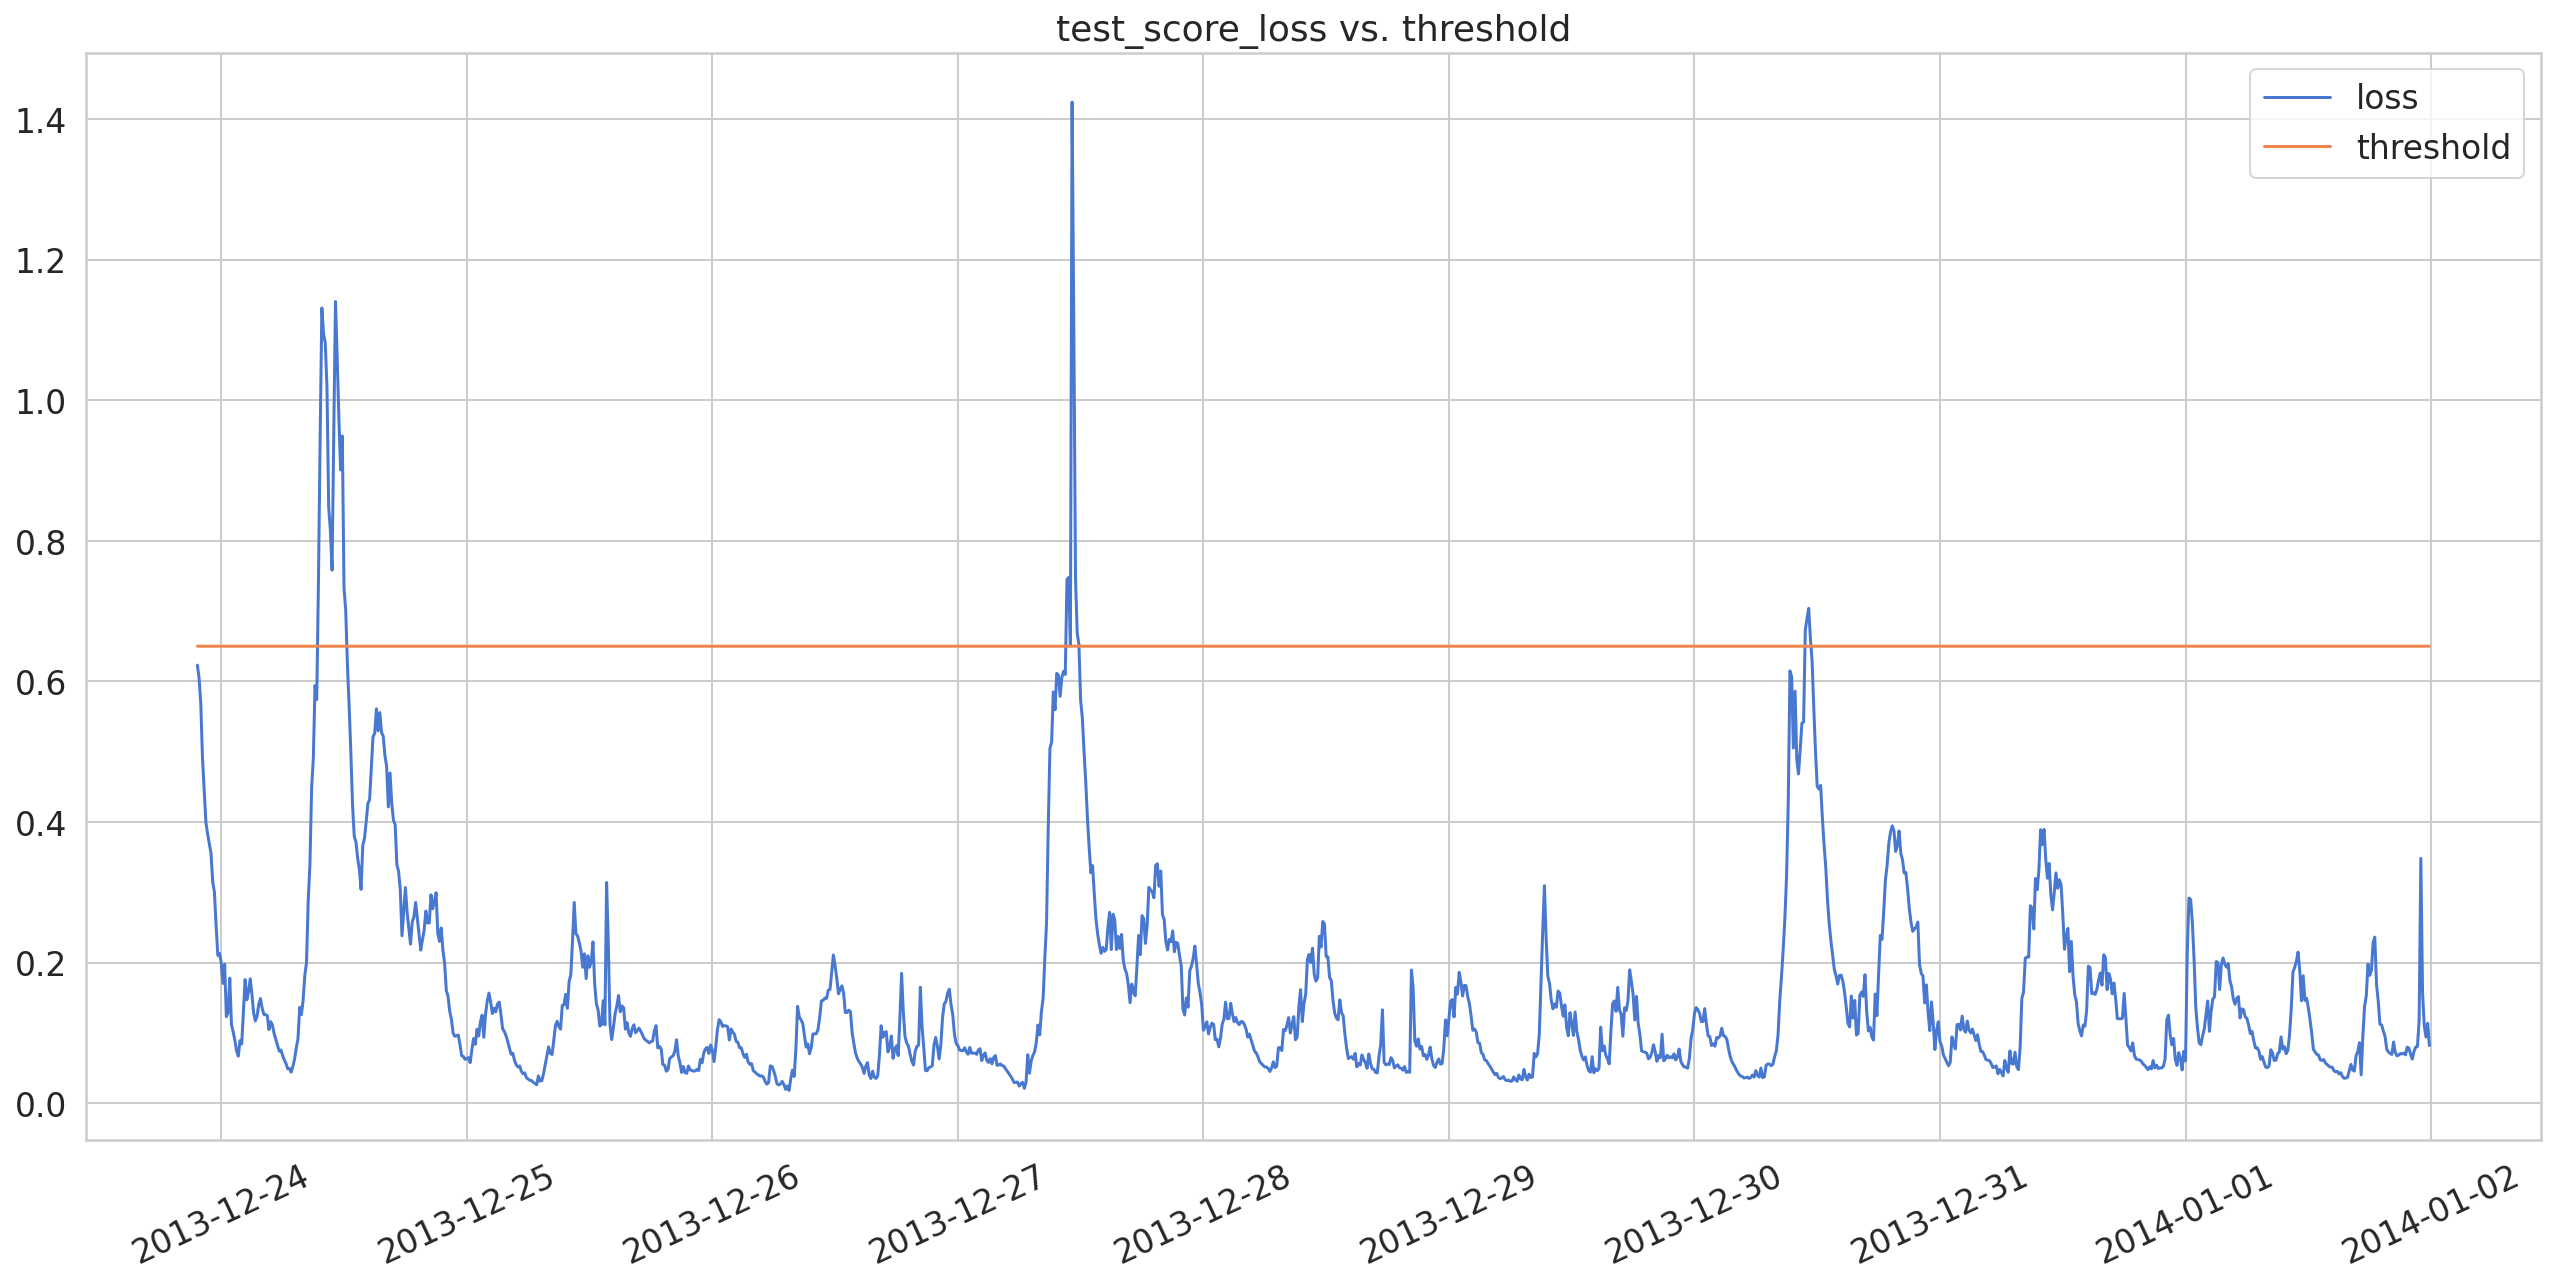

In [68]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.title('test_score_loss vs. threshold')
plt.legend();

When we apply the threshold to the predicted values which will give us the anomalies at the 
points which corresponding to the locations of the signal which above the threshold line the 
previous graph, we get the following graph for the anomalies.

In [69]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies

loss  threshold  anomaly  internet_cdr
time                                                           
2013-12-24 09:30:00  0.740610       0.65     True     -0.059819
2013-12-24 09:40:00  0.946874       0.65     True      0.113985
2013-12-24 09:50:00  1.131229       0.65     True     -0.010075
2013-12-24 10:00:00  1.094275       0.65     True      0.064849
2013-12-24 10:10:00  1.081460       0.65     True      0.064828
2013-12-24 10:20:00  1.018820       0.65     True     -0.044078
2013-12-24 10:30:00  0.847824       0.65     True      0.075923
2013-12-24 10:40:00  0.815129       0.65     True      0.067122
2013-12-24 10:50:00  0.758127       0.65     True      0.489340
2013-12-24 11:00:00  0.956047       0.65     True      0.665255
2013-12-24 11:10:00  1.140317       0.65     True      0.475134
2013-12-24 11:20:00  1.060045       0.65     True      0.471864
2013-12-24 11:30:00  0.973757       0.65     True      0.483278
2013-12-24 11:40:00  0.900818       0.65     True      0.670265
2013-12-24 11:50:00  0.949142       0.65     True      0.274818
2013-12-24 12:00:00  0.733119       0.65     True      0.485832
2013-12-24 12:10:00  0.701356       0.65     True      0.369643
2013-12-27 10:40:00  0.744935       0.65     True     -0.141519
2013-12-27 10:50:00  0.747872       0.65     True     -0.281809
2013-12-27 11:00:00  0.651385       0.65     True      1.115316
2013-12-27 11:10:00  1.424140       0.65     True     -0.005354
2013-12-27 11:20:00  1.107519       0.65     True     -0.246617
2013-12-27 11:30:00  0.746639       0.65     True     -0.102779
2013-12-27 11:40:00  0.668786       0.65     True     -0.012658
2013-12-27 11:50:00  0.652186       0.65     True     -0.122788
2013-12-30 10:50:00  0.672882       0.65     True     -0.172270
2013-12-30 11:00:00  0.689465       0.65     True     -0.117858
2013-12-30 11:10:00  0.703816       0.65     True     -0.163216
2013-12-30 11:20:00  0.660680       0.65     True     -0.143234

In [70]:
test_score_df['anomaly'].value_counts()

False    1281
True       29
Name: anomaly, dtype: int64

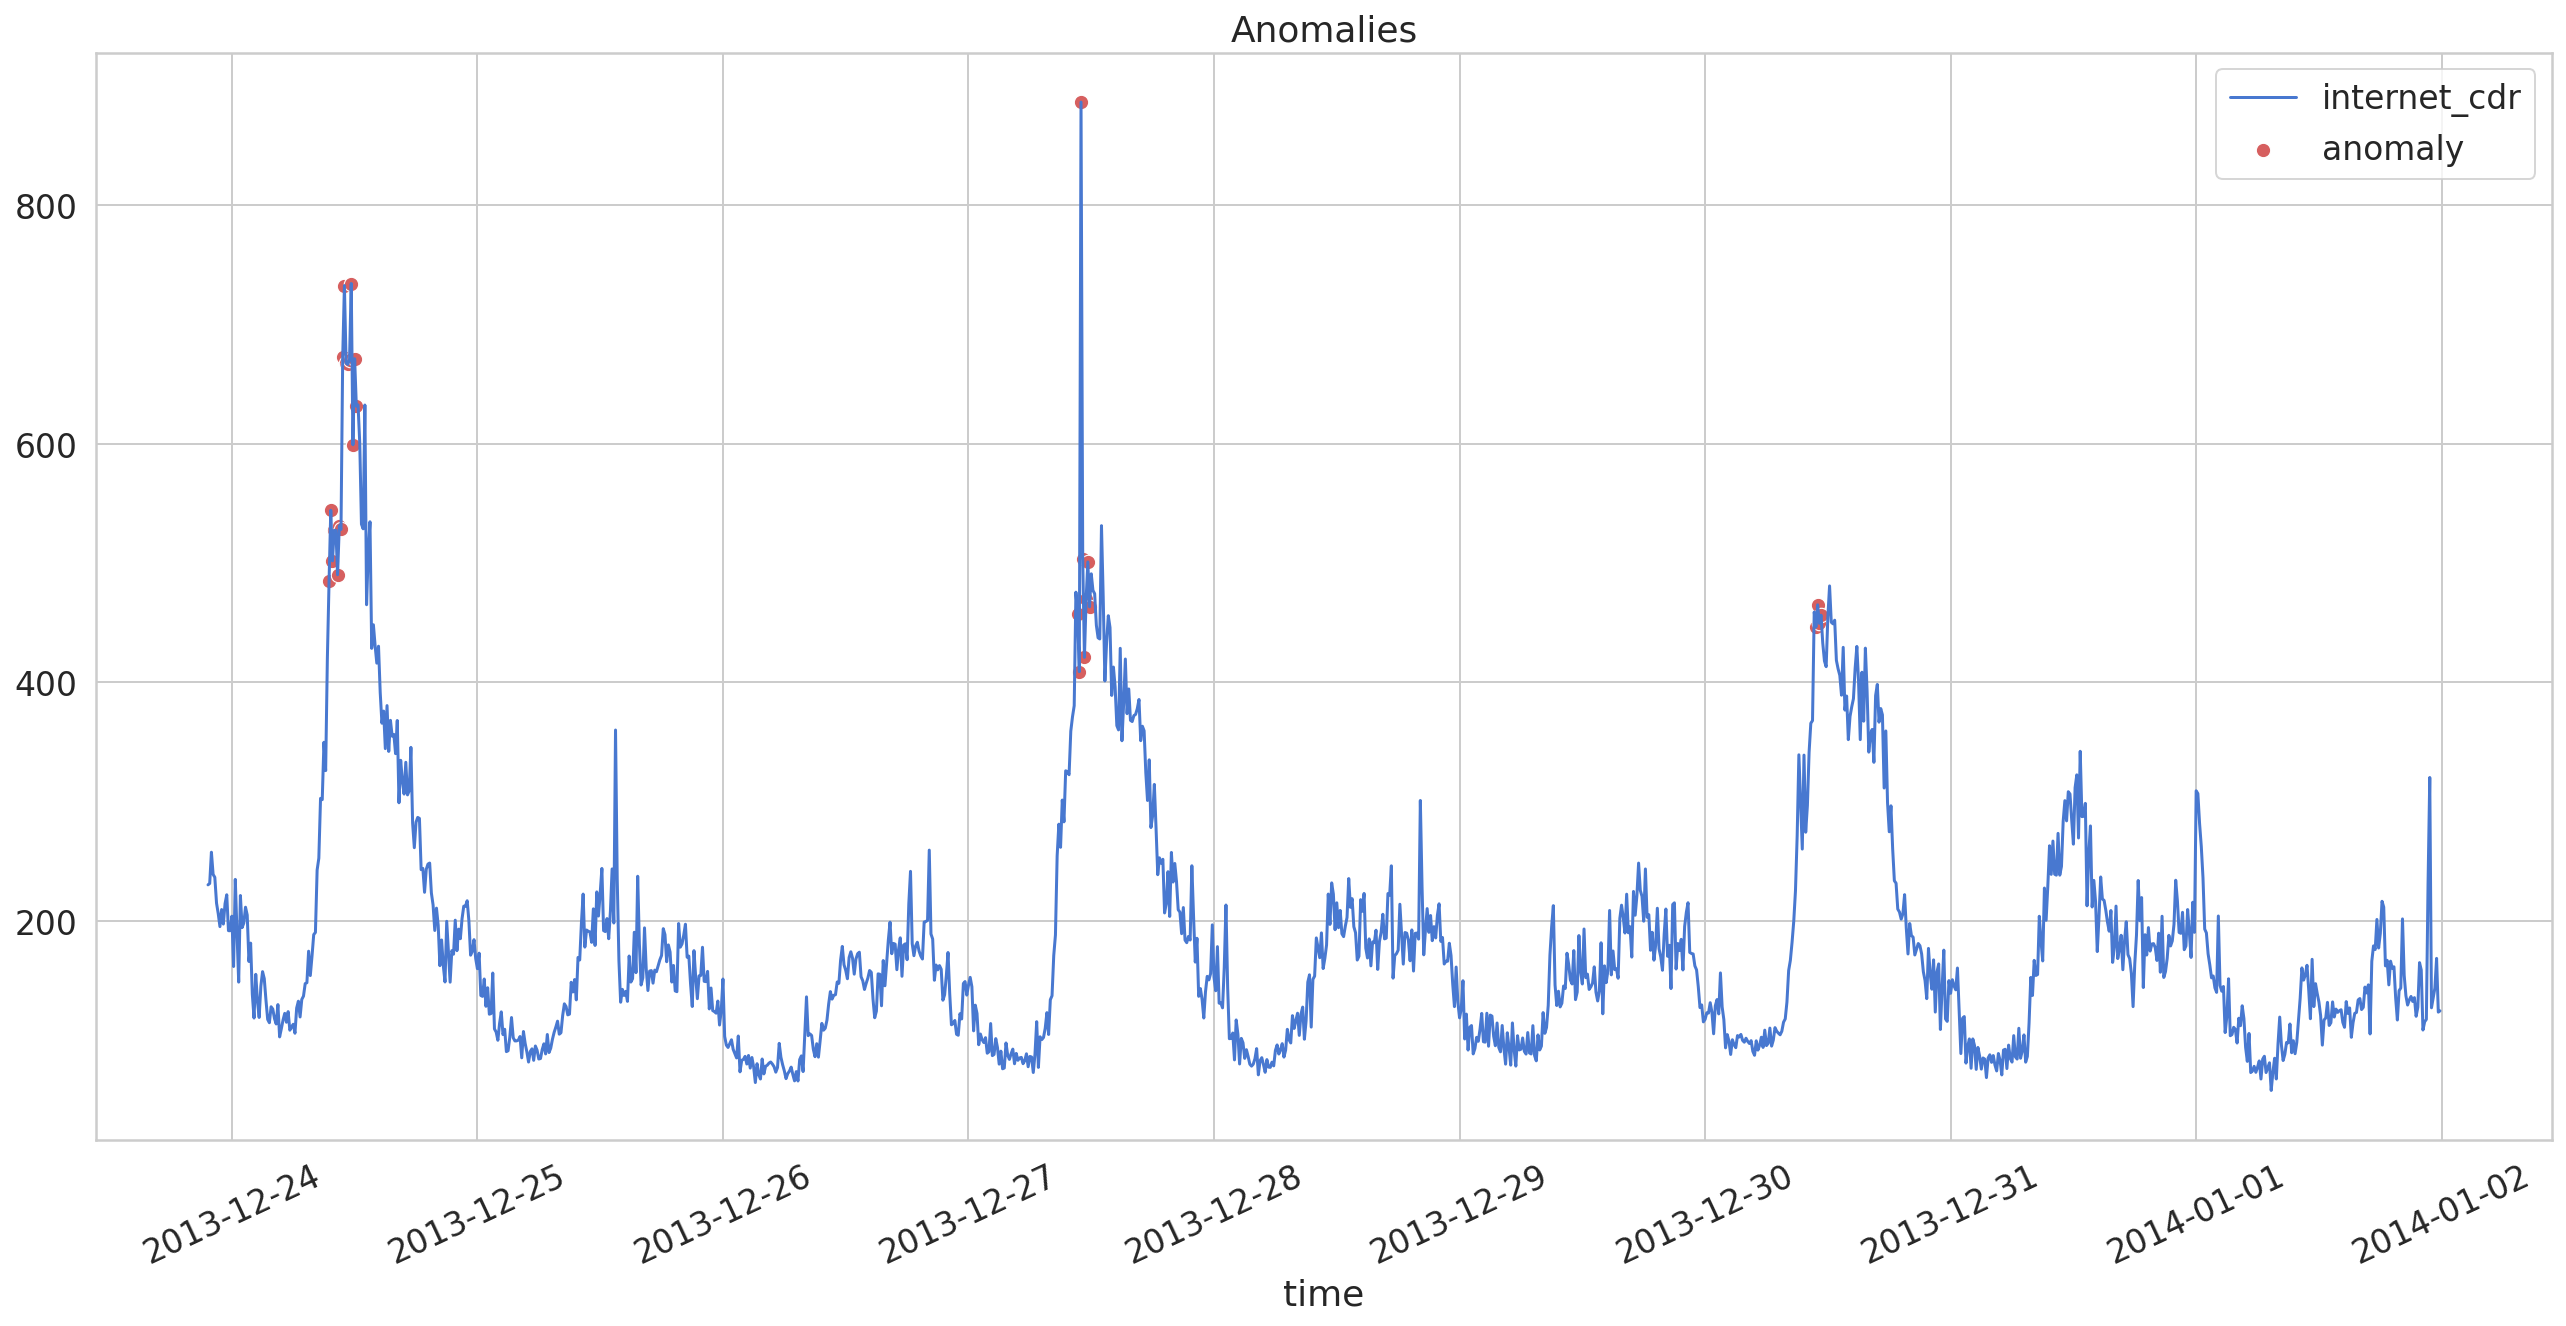

In [71]:
plt.plot(
  test[TIME_STEPS:].index, 
  scaler.inverse_transform(test[TIME_STEPS:].internet_cdr), 
  label='internet_cdr'
);

sns.scatterplot(
  anomalies.index,
  scaler.inverse_transform(anomalies.internet_cdr),
  color=sns.color_palette()[3],
  s=52,
  label='anomaly'
)
plt.xticks(rotation=25)
plt.title('Anomalies')
plt.legend();


## <h3> 4- Seasonal-Trend Decomposition.</h3>
<a id="m4"></a>
 
Now we will go to the final method which is decomposition. Signal decomposition aims to 
analysis our signal to its main three components Seasonal, trend and the residual (S, T, R). 
Seasonal is the signal component which contain the most rapidly pattern which occurs regular 
every cerin time. Trend contain the general shape of the data over the whole dataset and finally 
the residual is the rest of the signal after extract the seasonal and trend of it, it is in somehow a 
random part over the signal which indicate it.


The residual will be our focus here, we will first analysis the signal to its main three component 
and take the residual to work on it. 
We will apply the model by define the threshold which depend on the he confidence interval, 
then apply it for the residual then decide if this point is an anomaly or not.

In [72]:
df = pd.read_csv('/kaggle/input/milan-dataset/final_data.csv')
df.set_index('time', inplace=True)
df_=df

#### First apply on a random grid

In [73]:
random_grid=df.groupby("grid_square").get_group(5056)
random_grid.drop('grid_square', axis=1, inplace=True)
random_grid.head

<bound method NDFrame.head of                 internet_cdr
time                        
01-11-13 0:00     517.607260
01-11-13 0:10     314.551305
01-11-13 0:20     341.527327
01-11-13 0:30     450.012415
01-11-13 0:40     312.166782
...                      ...
01-01-14 23:10    135.564582
01-01-14 23:20    143.685136
01-01-14 23:30    168.564783
01-01-14 23:40    123.497984
01-01-14 23:50    124.569821

[8928 rows x 1 columns]>

In [74]:
from statsmodels.tsa.seasonal import STL

In [75]:
stl = STL(random_grid,period=12)
result = stl.fit()

In [76]:
seasonal = result.seasonal
trend = result.trend
resid = result.resid

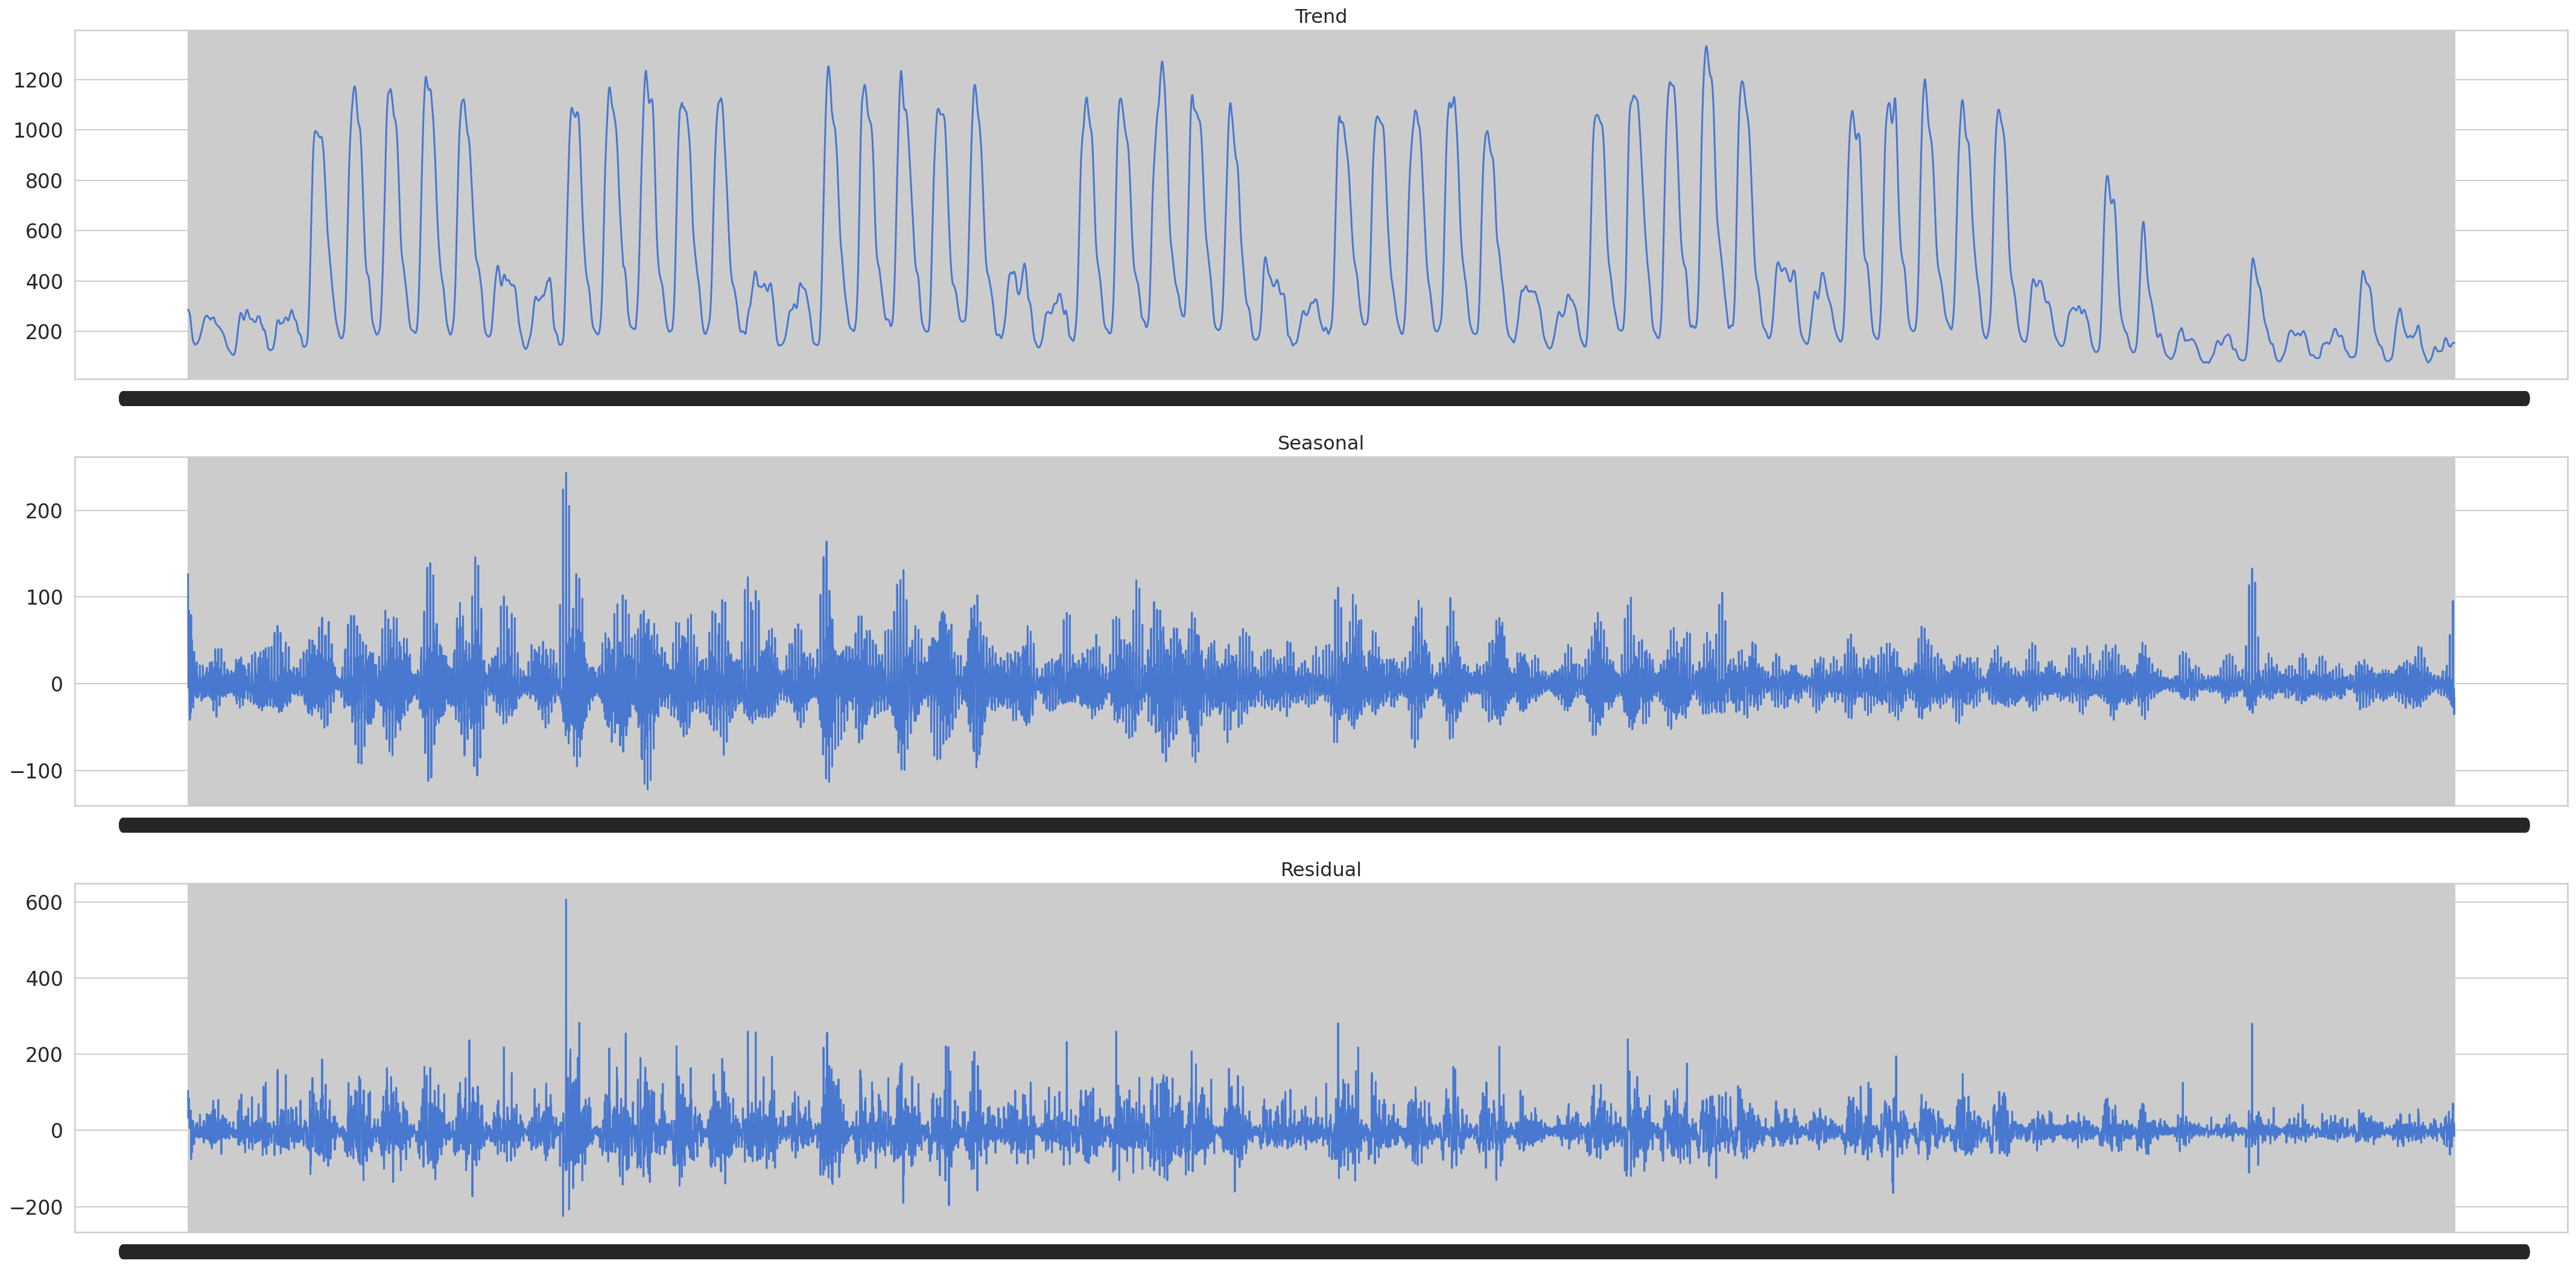

In [77]:
plt.figure(figsize=(30,15))



plt.subplot(3,1,1)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(3,1,2)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(3,1,3)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

To make the residual more obvious to us we will plot the signal with and without the residual 
component as the following: 

Text(0.5, 1.0, 'Random grid(5056) plot over (trend + seasonal) plot ')

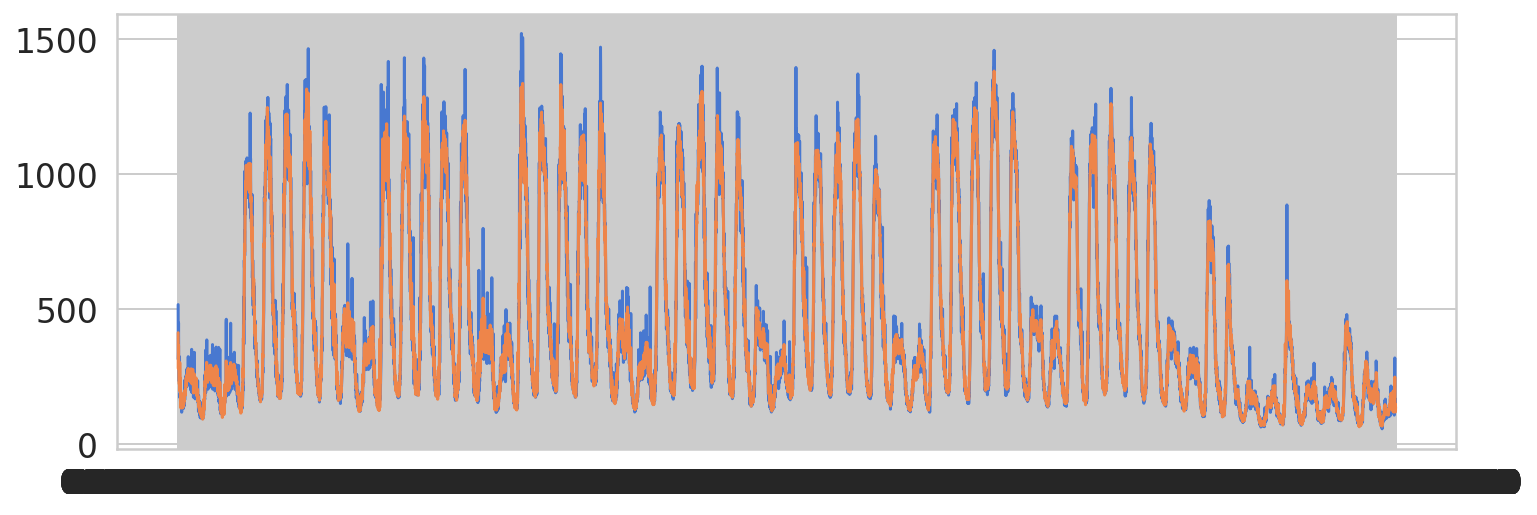

In [78]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(random_grid)
plt.plot(estimated)
ax.set_title('Random grid(5056) plot over (trend + seasonal) plot ', fontsize=20)

#### Anomaly Detection

In [79]:
random_grid = pd.concat([random_grid, resid.to_frame()], axis=1)
random_grid

internet_cdr       resid
time                                    
01-11-13 0:00     517.607260  104.021664
01-11-13 0:10     314.551305   33.870433
01-11-13 0:20     341.527327   59.077406
01-11-13 0:30     450.012415   84.207225
01-11-13 0:40     312.166782   30.642050
...                      ...         ...
01-01-14 23:10    135.564582   -3.217560
01-01-14 23:20    143.685136    0.013347
01-01-14 23:30    168.564783   19.156510
01-01-14 23:40    123.497984    3.291194
01-01-14 23:50    124.569821  -14.623582

[8928 rows x 2 columns]

In [80]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev
    
random_grid['anomaly'] = (random_grid['resid'] < lower) | (random_grid['resid'] > upper)
random_grid

internet_cdr       resid  anomaly
time                                             
01-11-13 0:00     517.607260  104.021664    False
01-11-13 0:10     314.551305   33.870433    False
01-11-13 0:20     341.527327   59.077406    False
01-11-13 0:30     450.012415   84.207225    False
01-11-13 0:40     312.166782   30.642050    False
...                      ...         ...      ...
01-01-14 23:10    135.564582   -3.217560    False
01-01-14 23:20    143.685136    0.013347    False
01-01-14 23:30    168.564783   19.156510    False
01-01-14 23:40    123.497984    3.291194    False
01-01-14 23:50    124.569821  -14.623582    False

[8928 rows x 3 columns]

In [81]:
random_grid['anomaly'].value_counts()

False    8774
True      154
Name: anomaly, dtype: int64

In [82]:
random_grid=random_grid.reset_index()
random_grid["time"] = pd.to_datetime(random_grid["time"])

In [83]:
# anomaly = full_grid.loc[full_grid['anomaly'] == True, ['internet_cdr']]
# anomaly.reset_index()

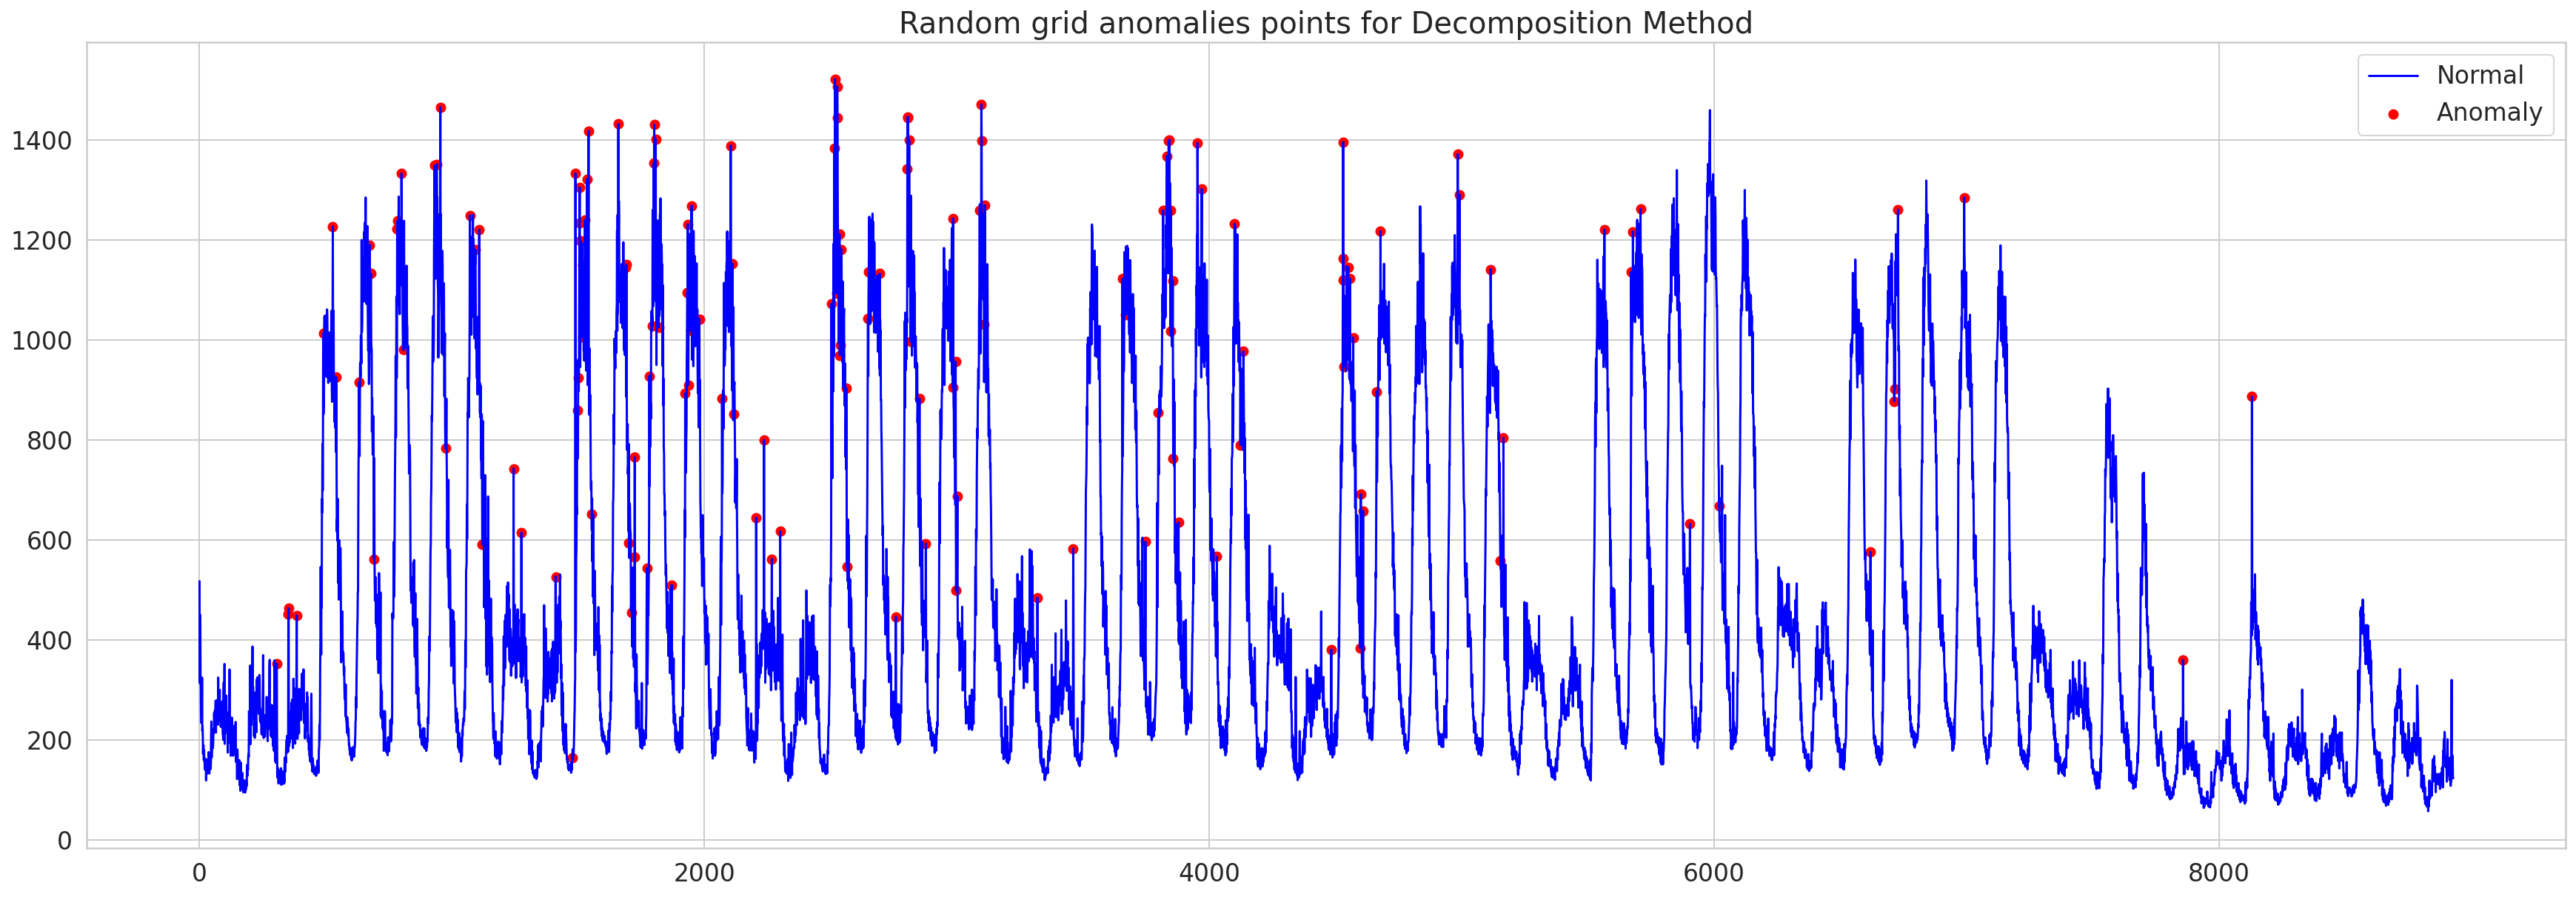

In [84]:
fig, ax = plt.subplots(figsize=(30,10))

anomaly = random_grid.loc[random_grid['anomaly'] == True, ['internet_cdr']] 

ax.plot(random_grid.index, random_grid['internet_cdr'], color='blue', label = 'Normal')
ax.scatter(anomaly.index,anomaly['internet_cdr'], color='red', label = 'Anomaly')
ax.set_title('Random grid anomalies points for Decomposition Method', fontsize=20)
plt.legend()
plt.show();

In [85]:
# fig1 = px.line(random_grid.reset_index(),  y="internet_cdr")
# fig1.update_traces(line=dict(color = 'magenta'))

# anomaly = random_grid.loc[random_grid['anomaly'] == True, ['internet_cdr']] 
# fig2 = px.scatter(anomaly,y="internet_cdr")

# fig3 = go.Figure(data=fig1.data + fig2.data)

# fig3.show()

#### Second apply on all grids

In [86]:
data=[]
for grid in grids:
    full_grid = df.groupby("grid_square").get_group(grid)
    full_grid.drop('grid_square', axis=1, inplace=True)
    data.append(full_grid)
data

[                internet_cdr
 time                        
 01-11-13 0:00     517.607260
 01-11-13 0:10     314.551305
 01-11-13 0:20     341.527327
 01-11-13 0:30     450.012415
 01-11-13 0:40     312.166782
 ...                      ...
 01-01-14 23:10    135.564582
 01-01-14 23:20    143.685136
 01-01-14 23:30    168.564783
 01-01-14 23:40    123.497984
 01-01-14 23:50    124.569821
 
 [8928 rows x 1 columns],
                 internet_cdr
 time                        
 01-11-13 0:00     403.180777
 01-11-13 0:10     310.131943
 01-11-13 0:20     308.682959
 01-11-13 0:30     357.021359
 01-11-13 0:40     303.474336
 ...                      ...
 01-01-14 23:10    161.004840
 01-01-14 23:20    135.048644
 01-01-14 23:30    157.011902
 01-01-14 23:40    164.511201
 01-01-14 23:50    146.336681
 
 [8928 rows x 1 columns],
                 internet_cdr
 time                        
 01-11-13 0:00     668.180795
 01-11-13 0:10     749.816592
 01-11-13 0:20     671.254568
 01-11-13 0:30

In [87]:
full_decom1 = pd.DataFrame()
full_decom2 = pd.DataFrame()
full_decom3 = pd.DataFrame()

stl = STL(data[1],period=12)
result = stl.fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid
seasonal=   seasonal.to_frame()
trend   =   trend.to_frame()
resid   =   resid.to_frame()
print("========== grid number {} done ==========".format(i+1))
full_decom1 = full_decom1.append(seasonal)
full_decom2 = full_decom2.append(trend)
full_decom3 = full_decom3.append(resid)

========== grid number 9 done ==========


In [88]:
seasonal_decom = pd.DataFrame()
trend_decom = pd.DataFrame()
resid_decom = pd.DataFrame()
for i in range (x):
    stl = STL(data[i],period=12)
    result = stl.fit()
    seasonal, trend, resid = result.seasonal, result.trend, result.resid
    seasonal=   seasonal.to_frame()
    trend   =   trend.to_frame()
    resid   =   resid.to_frame()
    print("========== grid number {} done ==========".format(i+1))
    seasonal_decom = seasonal_decom.append(seasonal)
    trend_decom    = trend_decom.append(trend)
    resid_decom    = resid_decom.append(resid)

========== grid number 1 done ==========
========== grid number 2 done ==========
========== grid number 3 done ==========
========== grid number 4 done ==========
========== grid number 5 done ==========
========== grid number 6 done ==========
========== grid number 7 done ==========
========== grid number 8 done ==========
========== grid number 9 done ==========


In [89]:
df = pd.concat([df, seasonal_decom,trend_decom,resid_decom], axis=1)
df

grid_square  internet_cdr      season       trend       resid
time                                                                         
01-11-13 0:00          5056    517.607260  126.434538  287.151058  104.021664
01-11-13 0:10          5056    314.551305   -4.707680  285.388552   33.870433
01-11-13 0:20          5056    341.527327   -1.066288  283.516208   59.077406
01-11-13 0:30          5056    450.012415   84.298944  281.506246   84.207225
01-11-13 0:40          5056    312.166782    2.227927  279.296805   30.642050
...                     ...           ...         ...         ...         ...
01-01-14 23:10         5258    153.632216   12.787457  137.535527    3.309232
01-01-14 23:20         5258    125.178334   -2.998953  137.458173   -9.280886
01-01-14 23:30         5258    104.560788  -23.821882  137.381282   -8.998613
01-01-14 23:40         5258    132.476372   -0.011810  137.299410   -4.811228
01-01-14 23:50         5258    123.704528   -0.847288  137.211583  -12.659766

[80352 rows x 5 columns]

####  Anomaly Detection

In [90]:
df1=df

In [91]:
data=[]
for grid in grids:
    full_grid = df.groupby("grid_square").get_group(grid)
    data.append(full_grid)
data

[                grid_square  internet_cdr      season       trend       resid
 time                                                                         
 01-11-13 0:00          5056    517.607260  126.434538  287.151058  104.021664
 01-11-13 0:10          5056    314.551305   -4.707680  285.388552   33.870433
 01-11-13 0:20          5056    341.527327   -1.066288  283.516208   59.077406
 01-11-13 0:30          5056    450.012415   84.298944  281.506246   84.207225
 01-11-13 0:40          5056    312.166782    2.227927  279.296805   30.642050
 ...                     ...           ...         ...         ...         ...
 01-01-14 23:10         5056    135.564582  -16.027409  154.809551   -3.217560
 01-01-14 23:20         5056    143.685136  -11.464713  155.136502    0.013347
 01-01-14 23:30         5056    168.564783   -6.030358  155.438631   19.156510
 01-01-14 23:40         5056    123.497984  -35.509481  155.716271    3.291194
 01-01-14 23:50         5056    124.569821  -16.7736

In [92]:
anomalies= pd.DataFrame()
for i in range (x):
    
    resid_mu = data[i]['resid'].mean()
    resid_dev = data[i]['resid'].std()

    lower = resid_mu - 3*resid_dev
    upper = resid_mu + 3*resid_dev
    

    anomaly = (data[i]['resid'] < lower) | (data[i]['resid'] > upper)
    print("========== grid number {} checked ==========".format(i+1))
    anomalies=anomalies.append(anomaly.to_frame())
    print(anomalies)


========== grid number 1 checked ==========
                resid
time                 
01-11-13 0:00   False
01-11-13 0:10   False
01-11-13 0:20   False
01-11-13 0:30   False
01-11-13 0:40   False
...               ...
01-01-14 23:10  False
01-01-14 23:20  False
01-01-14 23:30  False
01-01-14 23:40  False
01-01-14 23:50  False

[8928 rows x 1 columns]
========== grid number 2 checked ==========
                resid
time                 
01-11-13 0:00   False
01-11-13 0:10   False
01-11-13 0:20   False
01-11-13 0:30   False
01-11-13 0:40   False
...               ...
01-01-14 23:10  False
01-01-14 23:20  False
01-01-14 23:30  False
01-01-14 23:40  False
01-01-14 23:50  False

[17856 rows x 1 columns]
========== grid number 3 checked ==========
                resid
time                 
01-11-13 0:00   False
01-11-13 0:10   False
01-11-13 0:20   False
01-11-13 0:30   False
01-11-13 0:40   False
...               ...
01-01-14 23:10  False
01-01-14 23:20  False
01-01-14 23:30  False
01-

In [93]:
anomalies

resid
time                 
01-11-13 0:00   False
01-11-13 0:10   False
01-11-13 0:20   False
01-11-13 0:30   False
01-11-13 0:40   False
...               ...
01-01-14 23:10  False
01-01-14 23:20  False
01-01-14 23:30  False
01-01-14 23:40  False
01-01-14 23:50  False

[80352 rows x 1 columns]

In [94]:
df = pd.concat([df_, anomalies], axis=1).reset_index()
df["time"] = pd.to_datetime(df["time"])
df

time  grid_square  internet_cdr  resid
0     2013-01-11 00:00:00         5056    517.607260  False
1     2013-01-11 00:10:00         5056    314.551305  False
2     2013-01-11 00:20:00         5056    341.527327  False
3     2013-01-11 00:30:00         5056    450.012415  False
4     2013-01-11 00:40:00         5056    312.166782  False
...                   ...          ...           ...    ...
80347 2014-01-01 23:10:00         5258    153.632216  False
80348 2014-01-01 23:20:00         5258    125.178334  False
80349 2014-01-01 23:30:00         5258    104.560788  False
80350 2014-01-01 23:40:00         5258    132.476372  False
80351 2014-01-01 23:50:00         5258    123.704528  False

[80352 rows x 4 columns]

In [95]:
df['resid'].value_counts()

False    79094
True      1258
Name: resid, dtype: int64

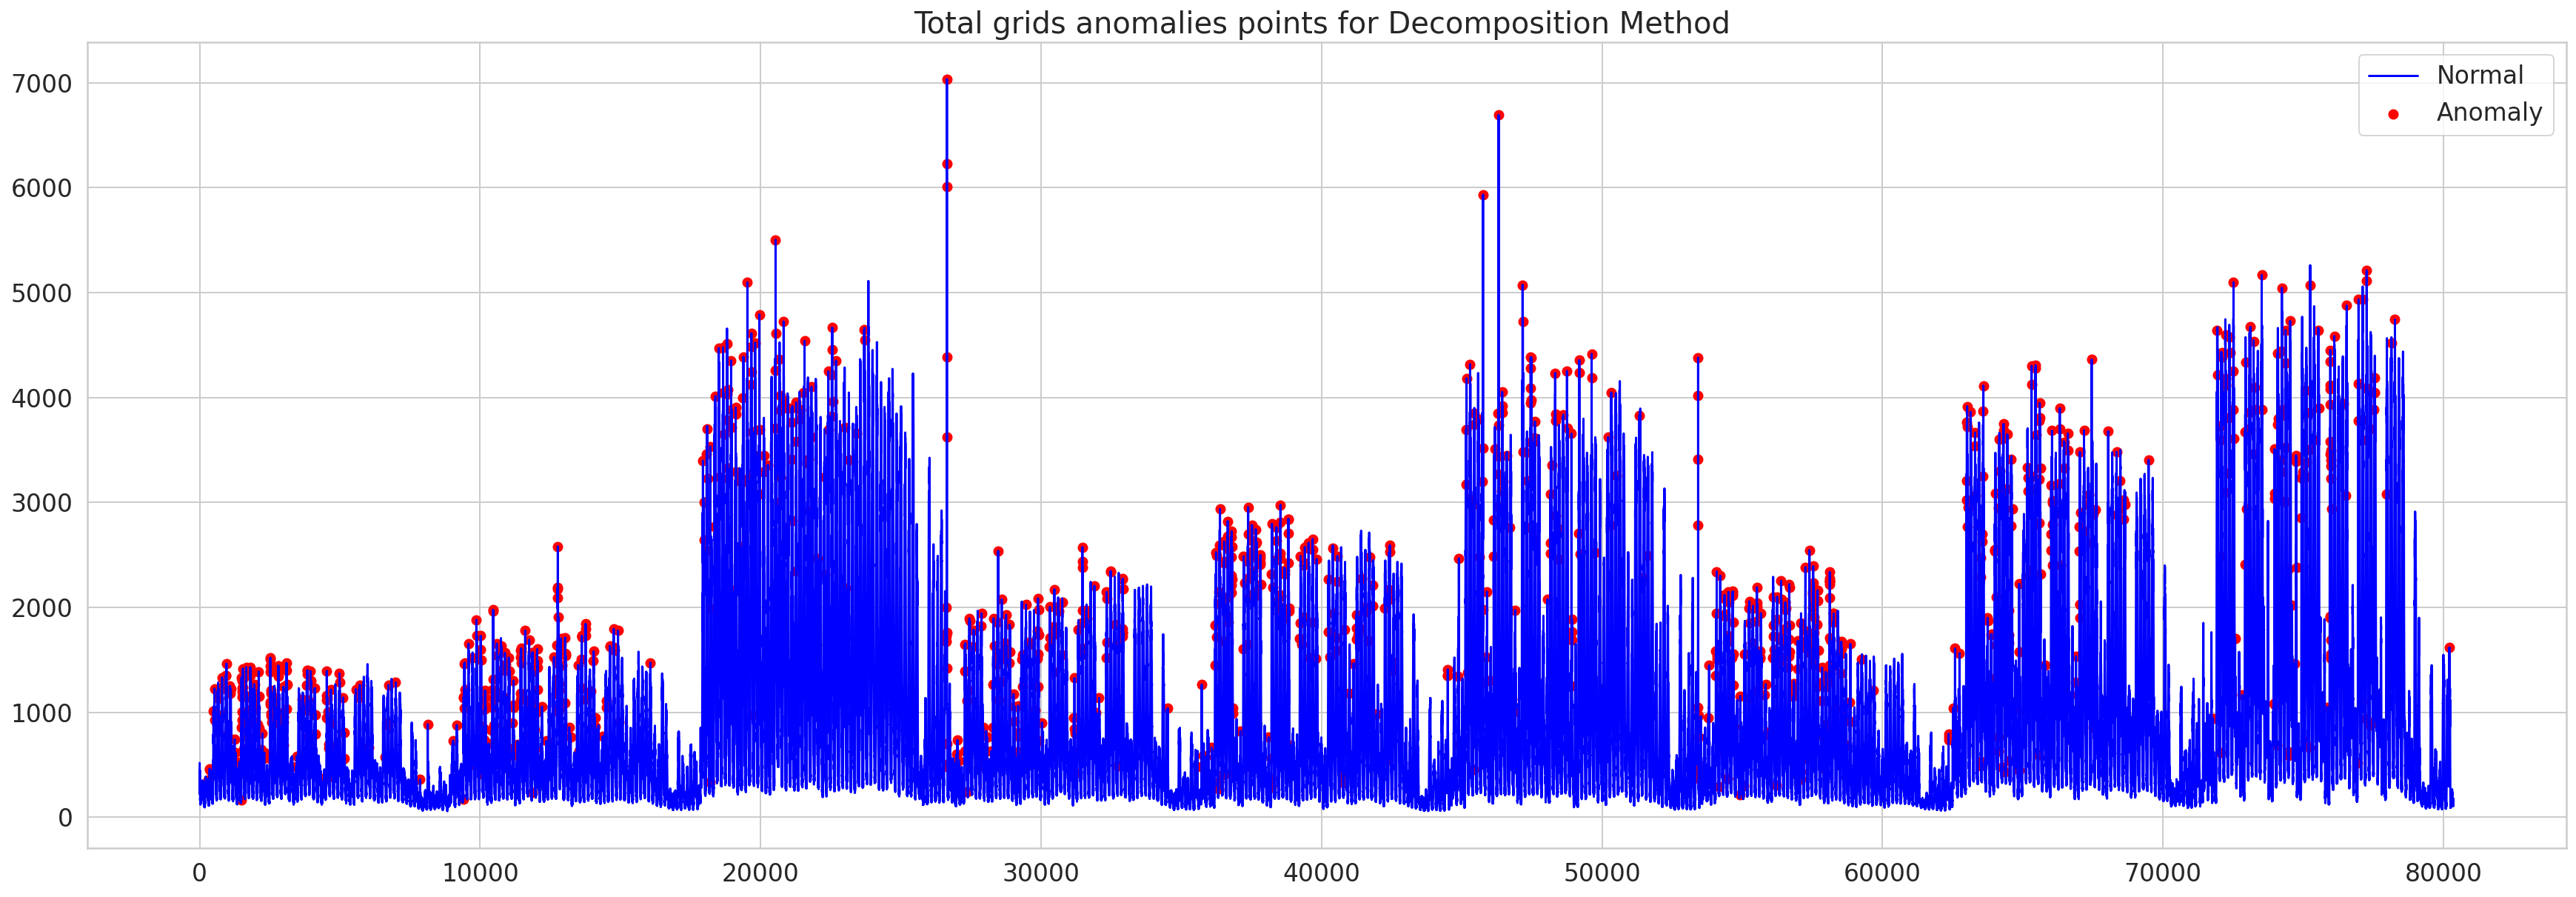

In [96]:
fig, ax = plt.subplots(figsize=(30,10))

anomaly = df.loc[df['resid'] == True, ['internet_cdr']] 

ax.plot(df.index, df['internet_cdr'], color='blue', label = 'Normal')
ax.scatter(anomaly.index,anomaly['internet_cdr'], color='red', label = 'Anomaly')
ax.set_title('Total grids anomalies points for Decomposition Method ', fontsize=20)
plt.legend()
plt.show();

In [97]:
# fig1 = px.line(df,  y="internet_cdr")
# fig1.update_traces(line=dict(color = 'turquoise'))

# anomaly = df.loc[df['resid'] == True, ['internet_cdr']] 

# fig2 = px.scatter(anomaly,y='internet_cdr')

# fig3 = go.Figure(data=fig1.data + fig2.data)

# fig3.show()

In [98]:
anomaly

internet_cdr
306      352.377304
352      451.709775
353      463.456650
385      448.798618
490     1012.517812
...             ...
77532   4187.446381
77959   3078.649034
78146   4517.146627
78269   4742.046834
80209   1619.034160

[1258 rows x 1 columns]

In [99]:
df.rename(columns = {"resid": "anomaly"}, inplace = True)
df

time  grid_square  internet_cdr  anomaly
0     2013-01-11 00:00:00         5056    517.607260    False
1     2013-01-11 00:10:00         5056    314.551305    False
2     2013-01-11 00:20:00         5056    341.527327    False
3     2013-01-11 00:30:00         5056    450.012415    False
4     2013-01-11 00:40:00         5056    312.166782    False
...                   ...          ...           ...      ...
80347 2014-01-01 23:10:00         5258    153.632216    False
80348 2014-01-01 23:20:00         5258    125.178334    False
80349 2014-01-01 23:30:00         5258    104.560788    False
80350 2014-01-01 23:40:00         5258    132.476372    False
80351 2014-01-01 23:50:00         5258    123.704528    False

[80352 rows x 4 columns]

In [100]:
#df.to_csv("anomaly.csv")

## What is next?
After determining the anomalies points what we should do about them? In the most common 
application like Microsoft anomaly detection, they have some web application to send some 
emails to the concerned persons about the sudden and didn’t expected change, then they take 
the right decision to solve this issue. 

But in our scope here we concerned with if this point is outlier or point of interest. 

<img src="https://github.com/abdallah-elsawy/Time-Series-Anomaly-Detection/blob/main/Outputs/Time-series-outliers.png?raw=true">

So, if the point we detected as outlier is a data that we did not need we will do on it some 
cleaning data processing. But in the other hand some time did not mean if there is some 
unusual event that we didn’t need it. Some event most be important to us because might this 
event will happen in the future so by studying it will make us have the ability to avoid this 
sudden change in the future by handle it by some control flow process. 
Here we after studying those points we will make all anomalies point as a nan value so will 
handle it in the coming part, Missing value imputation. 